# <font color=darkblue>Machine Learning Project: Credit Card Default Prediction </font>


**Goals:**
* Implementing different Default Credit Card prediction models using Default Credit Card Clients dataset
* Comparing the different models   
* Presenting the most efficient model

**Team Members:**
* Elyes Bensaid 
* Baha Eddine Ghrissi
* Azer Jomni
* Nermine Othmen
* Ala Garbey

**Class:** 
4DS2

In [4]:
# Library Imports 
import sys
!{sys.executable} -m pip install lightgbm

     ---------------------------------------- 1.0/1.0 MB 1.6 MB/s eta 0:00:00


In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import RobustScaler
from sklearn.decomposition import PCA
from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import matplotlib.ticker as mtick
import matplotlib.patches as mpatches
import seaborn as sns
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import SelectKBest
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import plot_confusion_matrix, classification_report,precision_recall_curve
from sklearn.metrics import roc_curve, auc,roc_auc_score
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import validation_curve
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_absolute_error, mean_squared_error, median_absolute_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.preprocessing import PolynomialFeatures
from sklearn.feature_selection import f_classif
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.naive_bayes import GaussianNB
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import StackingClassifier
from catboost import CatBoostClassifier
import lightgbm as lgb
from scipy.stats import uniform as sp_randFloat
from scipy.stats import randint as sp_randInt
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.svm import SVC
import pickle 

### I. Business understanding:

#### Our main goal is to Build a good accurate model able to predict default credit card of individual customers to reduce the credit risk ,damage and uncertainty.
This dataset contains information on default payments, demographic factors, credit data, history of payment, and bill statements of credit card clients in Taiwan from April 2005 to September 2005.
There are 25 variables:

* ID: ID of each client
* LIMIT_BAL: Amount of given credit in NT dollars (includes individual and family/supplementary credit
* SEX: Gender (1=male, 2=female)
* EDUCATION: (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)
* MARRIAGE: Marital status (1=married, 2=single, 3=others)
* AGE: Age in years
* PAY_0: Repayment status in September, 2005 (-1=pay duly, 1=payment delay for one month, 2=payment delay for two months, … 8=payment delay for eight months, 9=payment delay for nine months and above)
* PAY_2: Repayment status in August, 2005 (scale same as above)
* PAY_3: Repayment status in July, 2005 (scale same as above)
* PAY_4: Repayment status in June, 2005 (scale same as above)
* PAY_5: Repayment status in May, 2005 (scale same as above)
* PAY_6: Repayment status in April, 2005 (scale same as above)
* BILL_AMT1: Amount of bill statement in September, 2005 (NT dollar)
* BILL_AMT2: Amount of bill statement in August, 2005 (NT dollar)
* BILL_AMT3: Amount of bill statement in July, 2005 (NT dollar)
* BILL_AMT4: Amount of bill statement in June, 2005 (NT dollar)
* BILL_AMT5: Amount of bill statement in May, 2005 (NT dollar)
* BILL_AMT6: Amount of bill statement in April, 2005 (NT dollar)
* PAY_AMT1: Amount of previous payment in September, 2005 (NT dollar)
* PAY_AMT2: Amount of previous payment in August, 2005 (NT dollar)
* PAY_AMT3: Amount of previous payment in July, 2005 (NT dollar)
* PAY_AMT4: Amount of previous payment in June, 2005 (NT dollar)
* PAY_AMT5: Amount of previous payment in May, 2005 (NT dollar)
* PAY_AMT6: Amount of previous payment in April, 2005 (NT dollar)
* default.payment.next.month: Default payment (1=yes, 0=no)

### II. Data understanding

#### Import DATA

In [8]:
file = 'default of credit card clients.xls'
df = pd.read_excel(file,header=1, index_col=0)

In [9]:
df.columns.values

array(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1',
       'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6',
       'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5',
       'PAY_AMT6', 'default payment next month'], dtype=object)

In [10]:
df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
ID,,,,,,,,,,,,,,,,,,,,,
1,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
2,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30000 entries, 1 to 30000
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   LIMIT_BAL                   30000 non-null  int64
 1   SEX                         30000 non-null  int64
 2   EDUCATION                   30000 non-null  int64
 3   MARRIAGE                    30000 non-null  int64
 4   AGE                         30000 non-null  int64
 5   PAY_0                       30000 non-null  int64
 6   PAY_2                       30000 non-null  int64
 7   PAY_3                       30000 non-null  int64
 8   PAY_4                       30000 non-null  int64
 9   PAY_5                       30000 non-null  int64
 10  PAY_6                       30000 non-null  int64
 11  BILL_AMT1                   30000 non-null  int64
 12  BILL_AMT2                   30000 non-null  int64
 13  BILL_AMT3                   30000 non-null  int64
 14  BILL_A

In [252]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
LIMIT_BAL,30000.0,167484.322667,129747.661567,10000.0,50000.00,140000.0,240000.00,1000000.0
SEX,30000.0,1.603733,0.489129,1.0,1.00,2.0,2.00,2.0
EDUCATION,30000.0,1.853133,0.790349,0.0,1.00,2.0,2.00,6.0
MARRIAGE,30000.0,1.551867,0.521970,0.0,1.00,2.0,2.00,3.0
AGE,30000.0,35.485500,9.217904,21.0,28.00,34.0,41.00,79.0
PAY_0,30000.0,-0.016700,1.123802,-2.0,-1.00,0.0,0.00,8.0
PAY_2,30000.0,-0.133767,1.197186,-2.0,-1.00,0.0,0.00,8.0
PAY_3,30000.0,-0.166200,1.196868,-2.0,-1.00,0.0,0.00,8.0
PAY_4,30000.0,-0.220667,1.169139,-2.0,-1.00,0.0,0.00,8.0
PAY_5,30000.0,-0.266200,1.133187,-2.0,-1.00,0.0,0.00,8.0


- There are 30,000 distinct credit card clients.

- The average value for the amount of credit card limit is 167484.  max value being 1M.

- Education level is mostly graduate school and university.

- Average age is 35.5 years.

- the mean of 0.221 means that there are 22.1% of credit card contracts that will default next month

- Refer to PAY_1 ~ PAY_6, at least 75% of client are not in payment delay status

### Check missing data 

In [12]:
total = df.isnull().sum().sort_values(ascending = False)
percent = (df.isnull().sum()/df.isnull().count()*100).sort_values(ascending = False)
pd.concat([total, percent], axis=1, keys=['Total', 'Percent']).transpose()

,LIMIT_BAL,SEX,PAY_AMT6,PAY_AMT5,PAY_AMT4,PAY_AMT3,PAY_AMT2,PAY_AMT1,BILL_AMT6,BILL_AMT5,...,PAY_6,PAY_5,PAY_4,PAY_3,PAY_2,PAY_0,AGE,MARRIAGE,EDUCATION,default payment next month
Total,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Percent,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


There is no missing data in the entire dataset.

###### First Thing we would like to study the balance of our data.

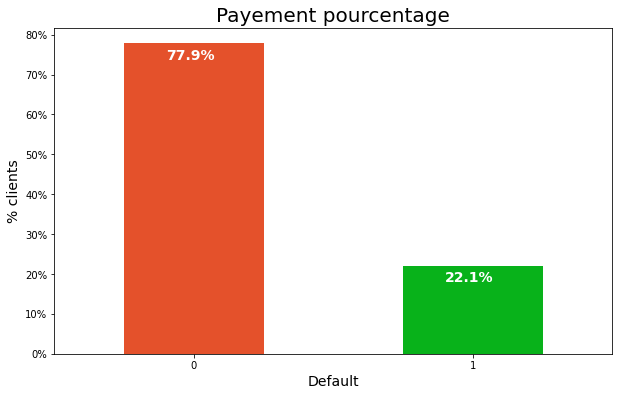

In [13]:
colors = ['#E4512B','#08B21A']
ax = (df['default payment next month'].value_counts()*100.0 /len(df)).plot(kind='bar',
                                                                           stacked = True,
                                                                          rot = 0,
                                                                          color = colors,
                                                                         figsize = (10,6))
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('% clients',size = 14)
ax.set_xlabel('Default',size = 14)
ax.set_title('Payement pourcentage', size = 20)

# create a list to collect the plt.patches data
totals = []

# find the values and append to list
for i in ax.patches:
    totals.append(i.get_width())

# set individual bar lables using above list
total = sum(totals)

for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_x()+.15, i.get_height()-4.0, \
            str(round((i.get_height()/total), 1))+'%',
            fontsize=12,
            color='white',
           weight = 'bold',
           size = 14)

- the graphic above proves that most of the clients will not default the next month.
- A number of 6,630 out of 30,000 (or 22.1%) of clients will default next month. The data has not a large unbalance .




#### Now we want to study the distribution of our features.

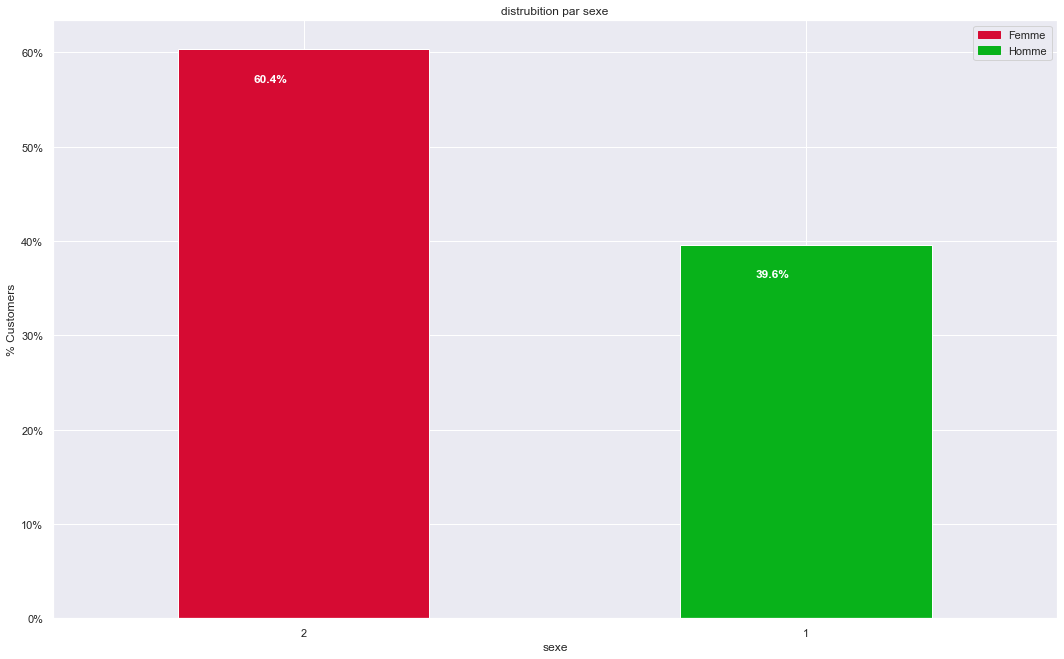

In [255]:
colors = ['#D60B33','#08B21A']
ax = (df['SEX'].value_counts()*100.0 /len(df)).plot(kind='bar',stacked = True,rot = 0,color = colors)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('% Customers')
ax.set_xlabel('sexe')
ax.set_ylabel('% Customers')
ax.set_title('distrubition par sexe')
#creattion de la liste
totals = []

#trouver les valeurs et les ajouter dans la liste
for i in ax.patches:
    totals.append(i.get_width())

# 
total = sum(totals)

for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_x()+.15, i.get_height()-3.5, \
            str(round((i.get_height()/total), 1))+'%',
            fontsize=12,
            color='white',
           weight = 'bold')
F = mpatches.Patch(color='#D60B33', label='Femme')
H = mpatches.Patch(color='#08B21A', label='Homme')

plt.legend(handles=[F,H])

- Most of the customers are women

C:\Users\elyes\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


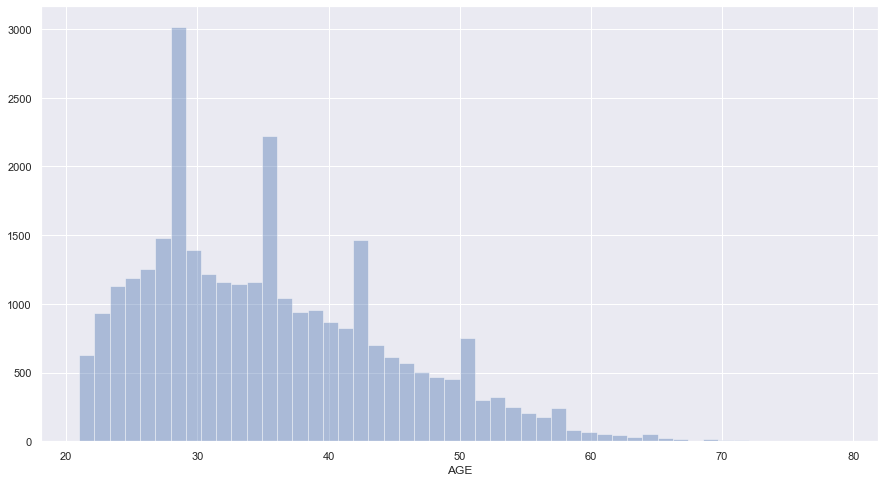

In [256]:
plt.figure(figsize=(15,8))
sns.distplot(df['AGE'], norm_hist=False, kde=False);

In [257]:
df['AGE'].describe()

count    30000.000000
mean        35.485500
std          9.217904
min         21.000000
25%         28.000000
50%         34.000000
75%         41.000000
max         79.000000
Name: AGE, dtype: float64

- Youngest client is 21 years old, and oldest is 79.
- Most client is age range from 26 to 35.
- With some specific age group having extra high number of people.

C:\Users\elyes\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


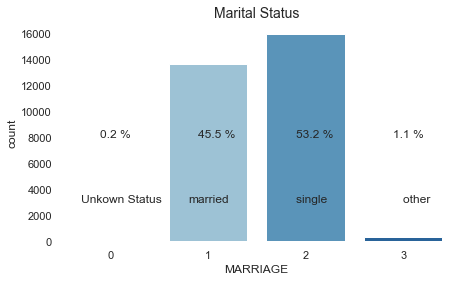

In [258]:
married = (df["MARRIAGE"]==1).sum()
single = (df["MARRIAGE"]==2).sum()
other = (df["MARRIAGE"]==3).sum()
UnkownStatus = (df["MARRIAGE"]==0).sum()+(df["MARRIAGE"]==5).sum()+(df["MARRIAGE"]==6).sum()
married_perc = round(married/len(df)*100, 1)
single_perc = round(single/len(df)*100, 1)
other_perc = round(other/len(df)*100, 1)
unkown_perc = round(UnkownStatus/len(df)*100, 1)
plt.figure(figsize=(7,4))

sns.countplot('MARRIAGE',data=df, palette="Blues")

plt.annotate('Unkown Status' , xy=(0.4, 15000), xytext=(-0.3, 3000), size=12)
plt.annotate('married', xy=(0.6, 15000), xytext=(0.8, 3000), size=12)
plt.annotate('single ', xy=(0.8, 15000), xytext=(1.9, 3000), size=12)
plt.annotate('other ', xy=(1, 15000), xytext=(3, 3000), size=12)

plt.annotate(str(married_perc)+" %", xy=(0.7, 15000), xytext=(0.9, 8000), size=12)
plt.annotate(str(single_perc)+" %", xy=(1.7, 15000), xytext=(1.9, 8000), size=12)
plt.annotate(str(unkown_perc)+" %", xy=(-0.3, 15000), xytext=(-0.1, 8000), size=12)
plt.annotate(str(other_perc)+" %", xy=(2.7, 15000), xytext=(2.9, 8000), size=12)

plt.title('Marital Status', size=14)
plt.box(False);

- Single clients are slightly more then married clients

### Visualize Categorical Data with Barchart


#### Education vs. DPNM

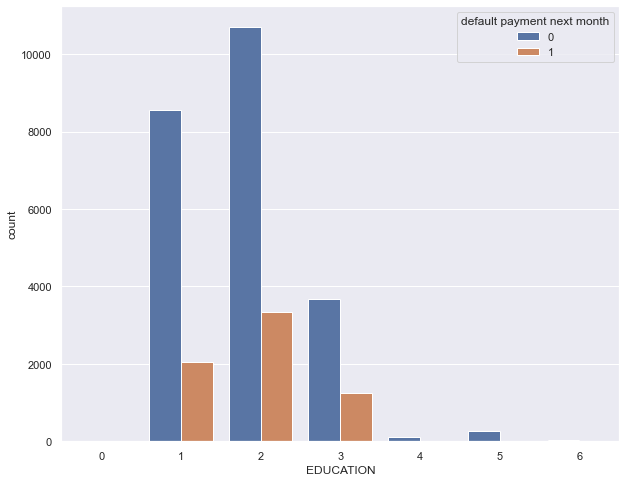

In [259]:
sns.set(rc={'figure.figsize':(10,8)})
education = sns.countplot(x='EDUCATION', hue='default payment next month', data=df)
education.set_xticklabels(['0','1','2','3','4','5','6'])
plt.show()

- In terms of Default , those with university level have higher chance of DPNM.

#### Marriage vs. DPNM

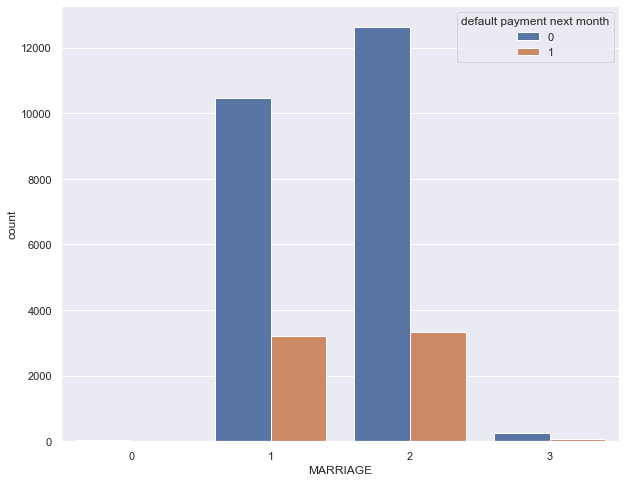

In [260]:
sns.set(rc={'figure.figsize':(10,8)})
marri = sns.countplot(x="MARRIAGE", hue='default payment next month', data=df)
marri.set_xticklabels(['0','1','2','3'])
plt.show()

- In terms of Default , those who single  have higher chance of NO DPNM

#### PAY vs. DPNM

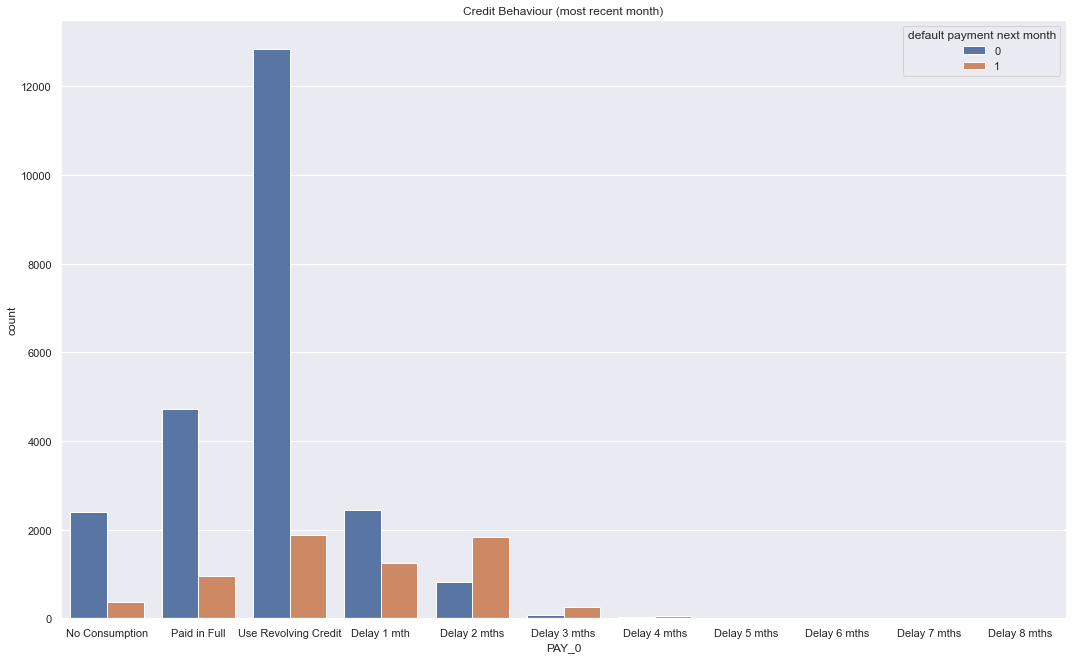

In [261]:
#In september
sns.set(rc={'figure.figsize':(18,11)})
pay1 = sns.countplot(x="PAY_0", hue='default payment next month', data=df)
pay1.set_xticklabels(['No Consumption','Paid in Full','Use Revolving Credit','Delay 1 mth','Delay 2 mths'
                     ,'Delay 3 mths','Delay 4 mths','Delay 5 mths','Delay 6 mths','Delay 7 mths','Delay 8 mths'])
pay1.set_title('Credit Behaviour (most recent month)')

plt.show()

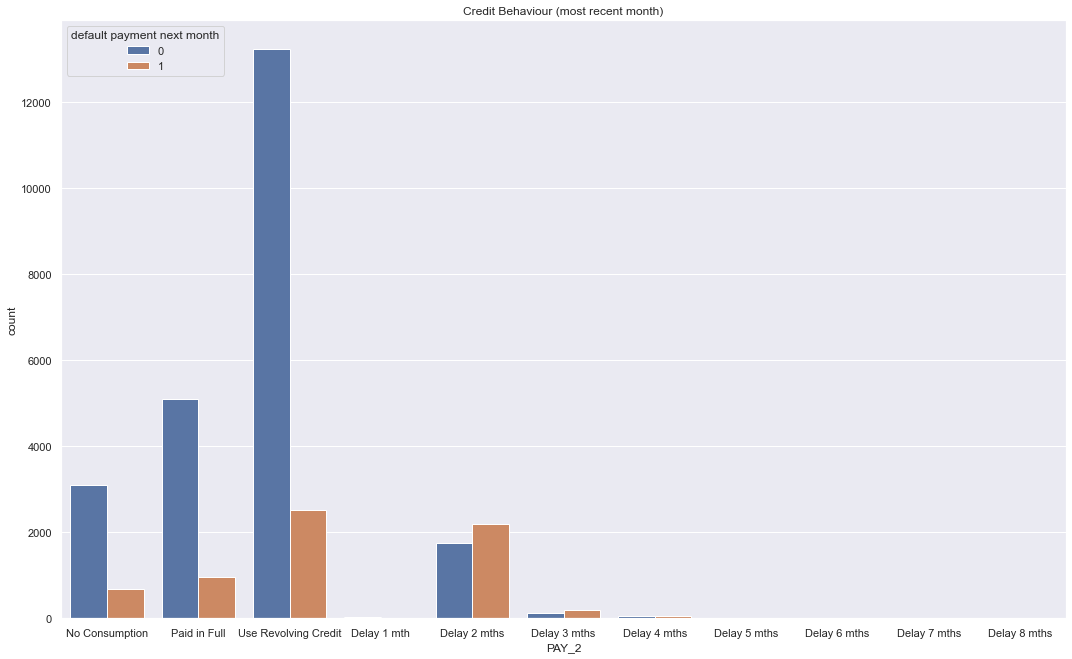

In [262]:
#In august
sns.set(rc={'figure.figsize':(18,11)})
pay1 = sns.countplot(x="PAY_2", hue='default payment next month', data=df)
pay1.set_xticklabels(['No Consumption','Paid in Full','Use Revolving Credit','Delay 1 mth','Delay 2 mths'
                     ,'Delay 3 mths','Delay 4 mths','Delay 5 mths','Delay 6 mths','Delay 7 mths','Delay 8 mths'])
pay1.set_title('Credit Behaviour (most recent month)')

plt.show()

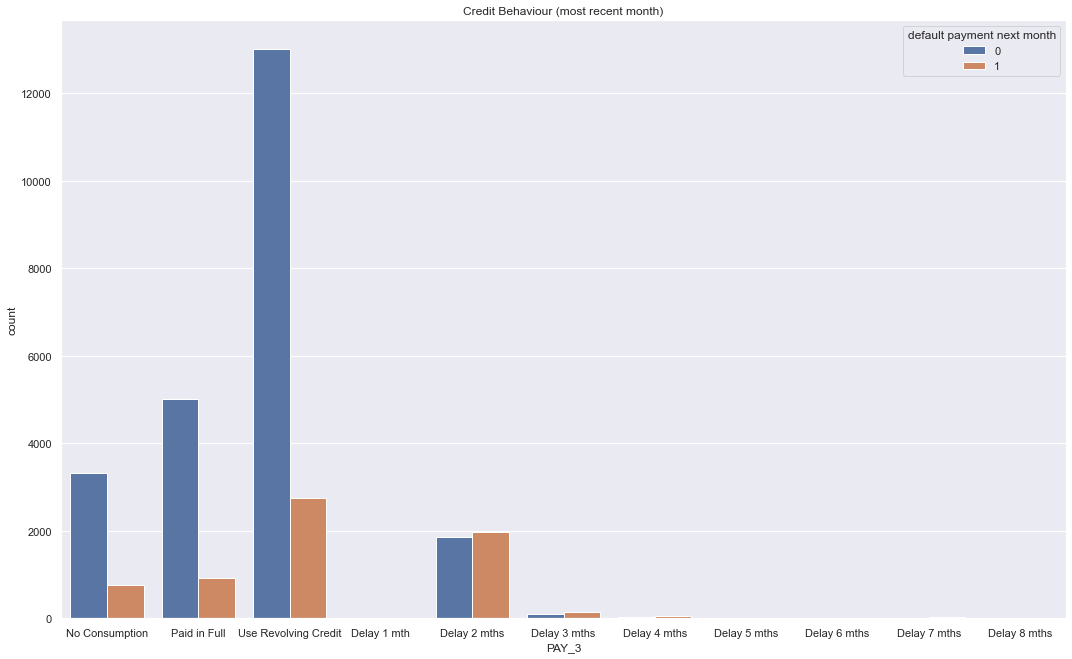

In [263]:
#In july
sns.set(rc={'figure.figsize':(18,11)})
pay1 = sns.countplot(x="PAY_3", hue='default payment next month', data=df)
pay1.set_xticklabels(['No Consumption','Paid in Full','Use Revolving Credit','Delay 1 mth','Delay 2 mths'
                     ,'Delay 3 mths','Delay 4 mths','Delay 5 mths','Delay 6 mths','Delay 7 mths','Delay 8 mths'])
pay1.set_title('Credit Behaviour (most recent month)')

plt.show()

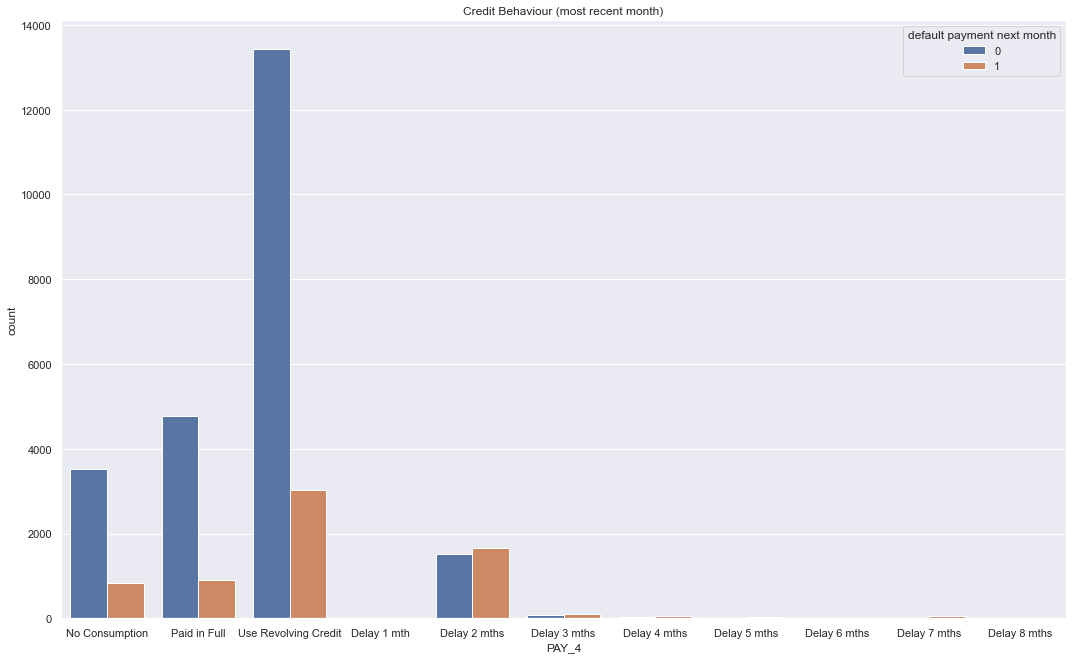

In [264]:
# in June
sns.set(rc={'figure.figsize':(18,11)})
pay1 = sns.countplot(x="PAY_4", hue='default payment next month', data=df)
pay1.set_xticklabels(['No Consumption','Paid in Full','Use Revolving Credit','Delay 1 mth','Delay 2 mths'
                     ,'Delay 3 mths','Delay 4 mths','Delay 5 mths','Delay 6 mths','Delay 7 mths','Delay 8 mths'])
pay1.set_title('Credit Behaviour (most recent month)')

plt.show()

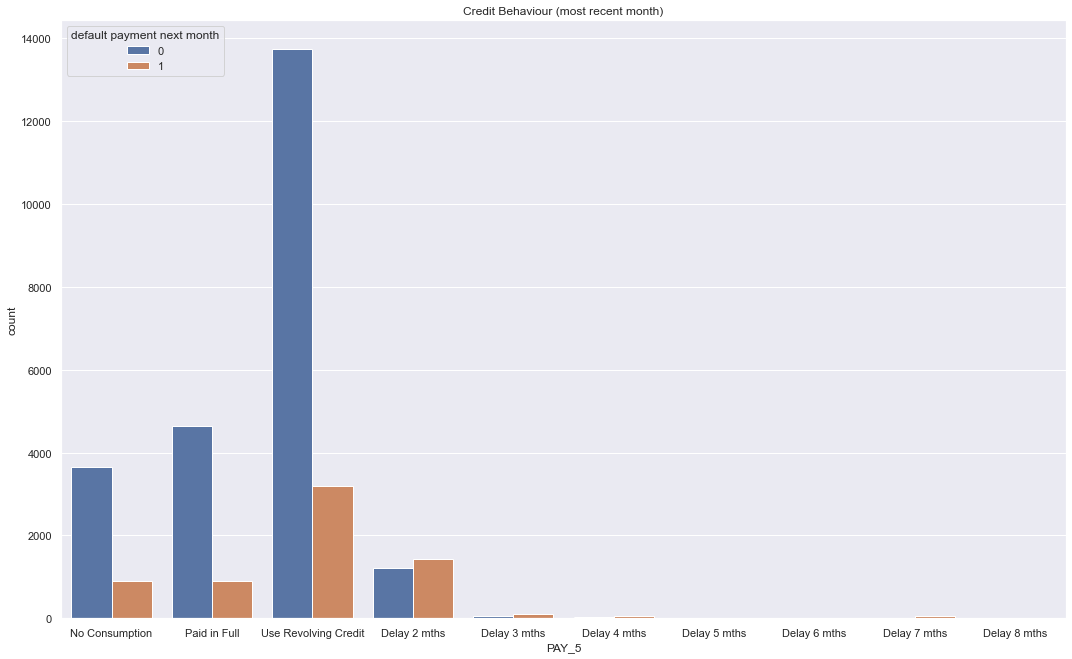

In [265]:
#in May
sns.set(rc={'figure.figsize':(18,11)})
pay1 = sns.countplot(x="PAY_5", hue='default payment next month', data=df)
pay1.set_xticklabels(['No Consumption','Paid in Full','Use Revolving Credit','Delay 2 mths'
                     ,'Delay 3 mths','Delay 4 mths','Delay 5 mths','Delay 6 mths','Delay 7 mths','Delay 8 mths'])
pay1.set_title('Credit Behaviour (most recent month)')

plt.show()


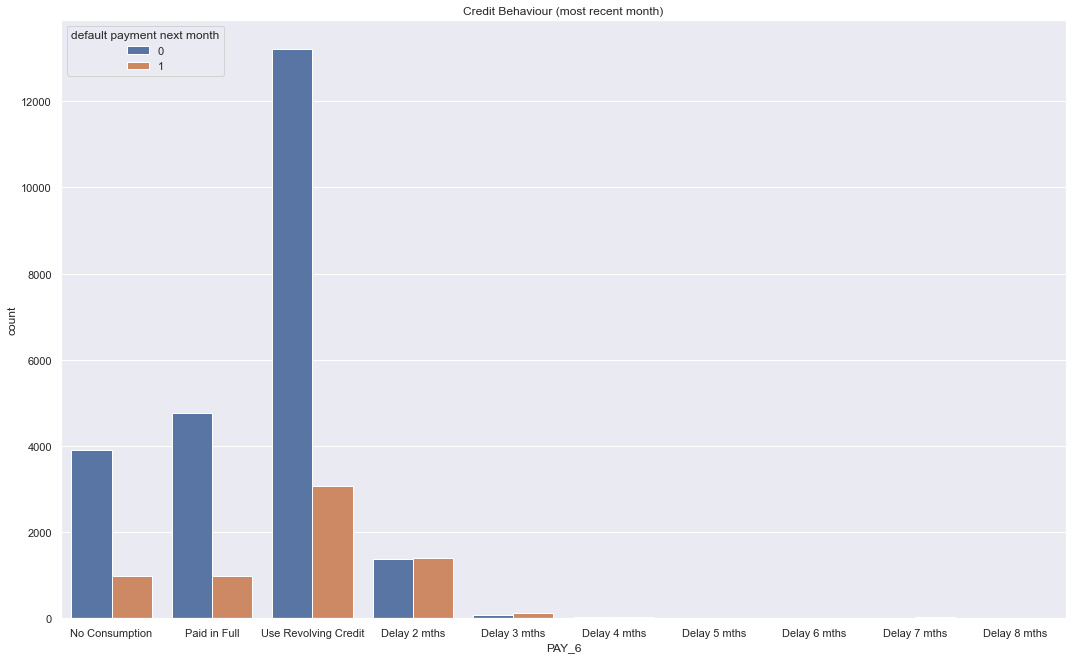

In [266]:
#April
sns.set(rc={'figure.figsize':(18,11)})
pay1 = sns.countplot(x="PAY_6", hue='default payment next month', data=df)
pay1.set_xticklabels(['No Consumption','Paid in Full','Use Revolving Credit','Delay 2 mths'
                     ,'Delay 3 mths','Delay 4 mths','Delay 5 mths','Delay 6 mths','Delay 7 mths','Delay 8 mths'])
pay1.set_title('Credit Behaviour (most recent month)')

plt.show()



 - Those Using Revolving Credit (paid only minimum)  have the highest Default Count.


### Age vs. Default


In [14]:
default0 = df.groupby(df['AGE'][df['default payment next month'] == 0]).size().reset_index(name='NOT_DPNM')
default1 = df.groupby(df['AGE'][df['default payment next month'] == 1]).size().reset_index(name='DPNM')
total = df.groupby('AGE').size().reset_index(name='TOTAL')

ageTable = total.join(default0.set_index('AGE'),on='AGE').join(default1.set_index('AGE'),on='AGE')

ageTable

,AGE,TOTAL,NOT_DPNM,DPNM
0,21,67,53,14.0
1,22,560,391,169.0
2,23,931,684,247.0
3,24,1127,827,300.0
4,25,1186,884,302.0
5,26,1256,1003,253.0
6,27,1477,1164,313.0
7,28,1409,1123,286.0
8,29,1605,1292,313.0
9,30,1395,1121,274.0


<AxesSubplot:xlabel='AGE', ylabel='count'>

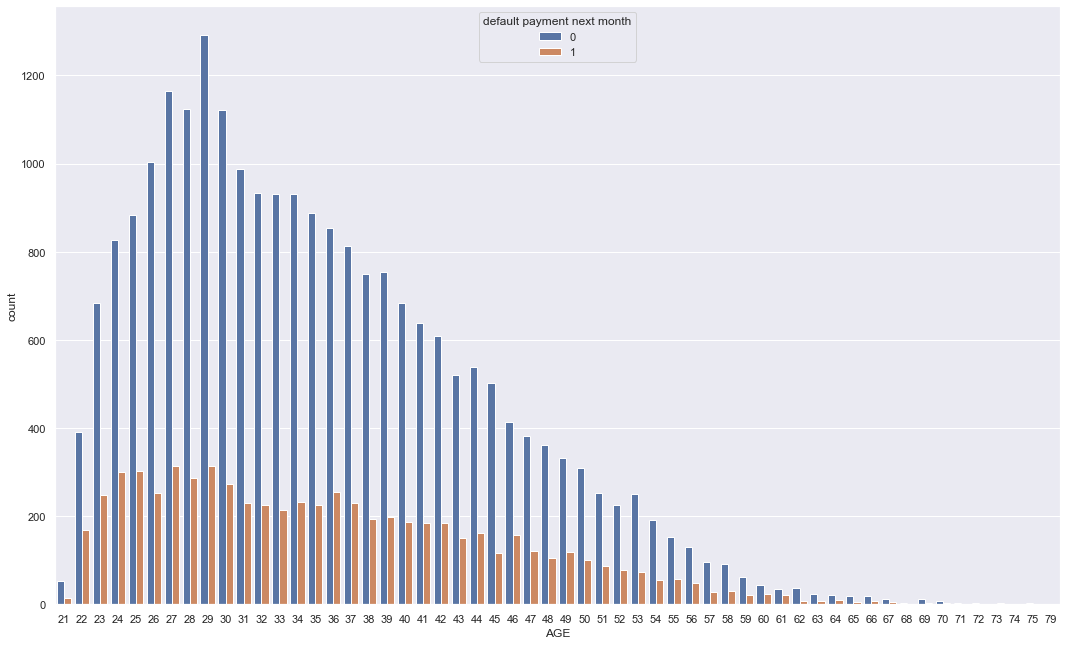

In [268]:
sns.countplot(x='AGE', hue='default payment next month', data=df)

- For each age group > 60, we only have few data. So the percentage may not be reliable.
- Take a close look at age range from 26 to 35, they have comparative lower default rate. This is also supported by large amount of data

### Heatmap

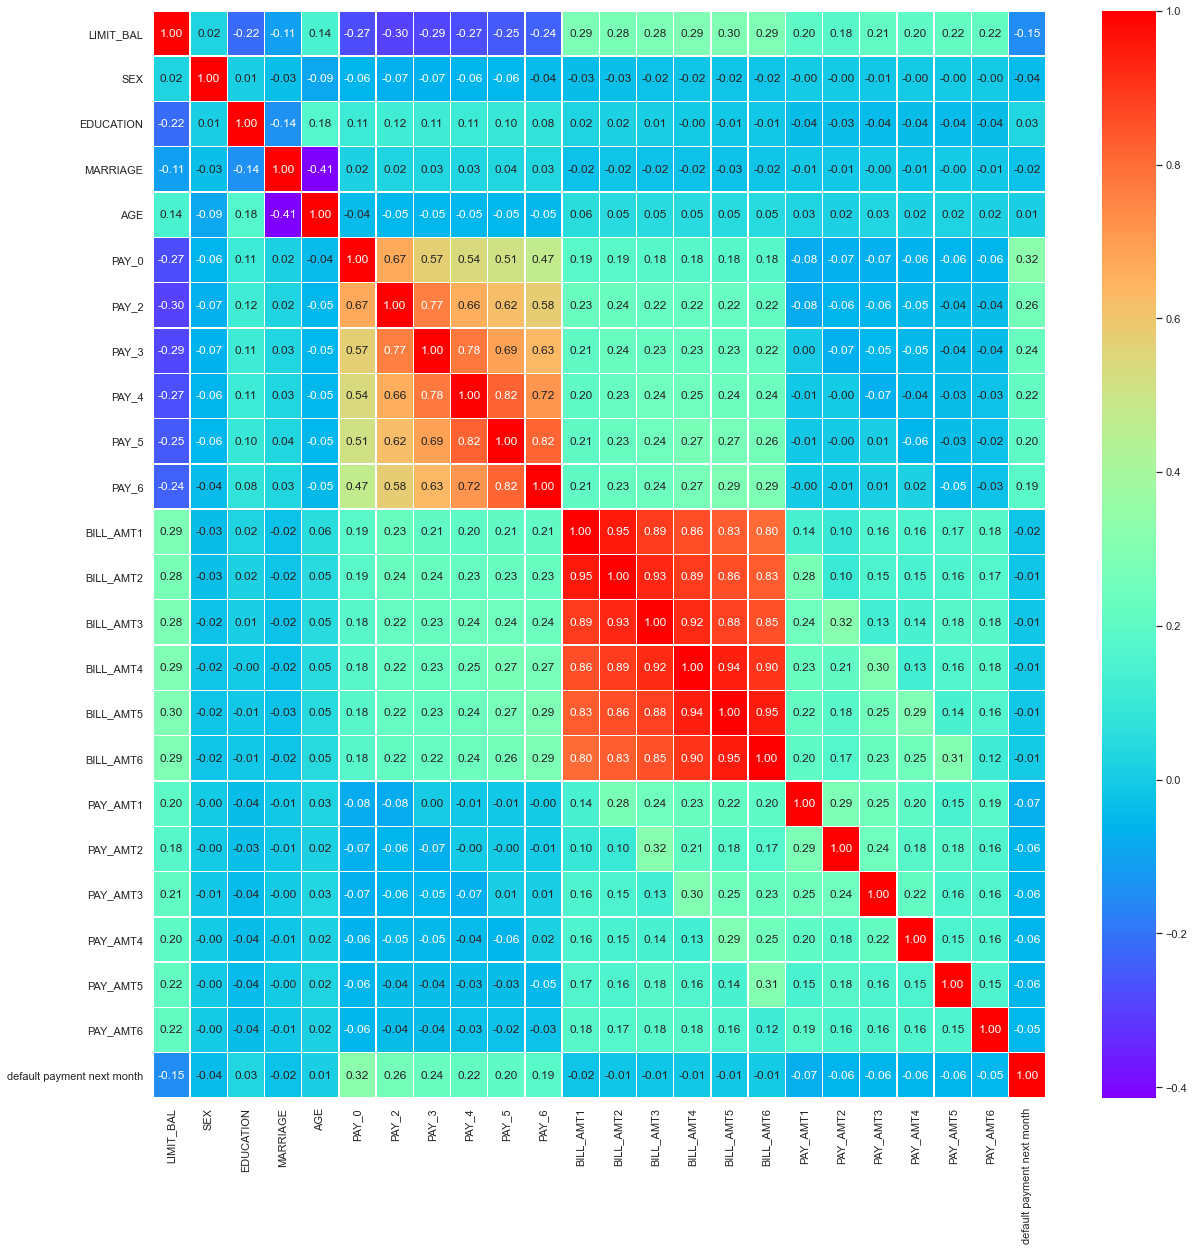

In [269]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(),annot=True, cmap='rainbow',linewidth=0.5, fmt='.2f');

#### Look at DPNM correlation with other variables.

- Lowest is -0.15 correlate with LIMIT_BAL.
- negative correlation indicates higher Credit Limit, lower DPNM.
- Highest is 0.32 correlate with PAY_0.
- positive correlation indicates longer period of Delay Payment, higher DPNM.
- In general PAY_0 ~ PAY_6 have higher correlation to DPNM compare to other variables.
#### clients payment behaviour give strong indication on Default.














#### III. Data preparation 

Organiser les données pour la modélisation

We notice that the EDUCATION feature contains values that does not belong to [1..4].So we will consider them as Others case and
we will assign 4.

In [15]:
df.loc[df['EDUCATION']==0,'EDUCATION']=4
df.loc[df['EDUCATION']==6,'EDUCATION']=4
df.loc[df['EDUCATION']==5,'EDUCATION']=4

df.EDUCATION.value_counts()

2    14030
1    10585
3     4917
4      468
Name: EDUCATION, dtype: int64

MARRIAGE feature also contains some odd values that we will consider as other.

In [16]:
df.loc[df['MARRIAGE']==0,'MARRIAGE']=3
df.loc[df['MARRIAGE']==4,'MARRIAGE']=3

df.MARRIAGE.value_counts()

2    15964
1    13659
3      377
Name: MARRIAGE, dtype: int64

We have noticed that despite paying their bills in full or having an empty bill, some clients are still considered to be behind on their payments.An error which could be caused by bureaucracy that result to a late update of data.Anyway,lines of missleading can not be part of model creation so we have to cut it loose.

In [17]:
indexes=df[(df['BILL_AMT1']==df['PAY_AMT1'])&((df['PAY_0']!=-1)|(df['PAY_0']!=-2))].index
df.drop(indexes,inplace=True)
indexes=df[(df['BILL_AMT2']==df['PAY_AMT2'])&((df['PAY_2']!=-1)|(df['PAY_2']!=-2))].index
df.drop(indexes,inplace=True)
indexes=df[(df['BILL_AMT3']==df['PAY_AMT3'])&((df['PAY_3']!=-1)|(df['PAY_3']!=-2))].index
df.drop(indexes,inplace=True)
indexes=df[(df['BILL_AMT4']==df['PAY_AMT4'])&((df['PAY_4']!=-1)|(df['PAY_4']!=-2))].index
df.drop(indexes,inplace=True)
indexes=df[(df['BILL_AMT5']==df['PAY_AMT5'])&((df['PAY_5']!=-1)|(df['PAY_5']!=-2))].index
df.drop(indexes,inplace=True)
indexes=df[(df['BILL_AMT6']==df['PAY_AMT6'])&((df['PAY_6']!=-1)|(df['PAY_6']!=-2))].index
df.drop(indexes,inplace=True)

In [18]:
df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
ID,,,,,,,,,,,,,,,,,,,,,
2,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
6,50000,1,1,2,37,0,0,0,0,0,...,19394,19619,20024,2500,1815,657,1000,1000,800,0


### Data Splitting And Scaling

The main goal behind using a scaler is to normalize the range of our features.And for that we have choosen the RobustScaler.

In [19]:
x=df.drop('default payment next month',axis=1)
y=df['default payment next month']
sc = RobustScaler()
X_sc = sc.fit_transform(x)
X = pd.DataFrame(X_sc, columns=x.columns)

Data Splitting is neccesary for our project Since using the same data for testing and training might cause an Overfitting So we need both train and test set.Also, we already established the fact that our data is umbalanced so in order to ensure that our new sets will represent this umbalance we assigned our targets to the stratify parameter. 

In [20]:
X_train,X_test,Y_train,Y_test=train_test_split(X,y,test_size=0.2,random_state=5,stratify=y)

## Feature Selection

Feature Selection is a proccess during which we aim to get rid of the least important features so we can have better results faster.And for that we have choosen VarianceThreshold.

In [21]:
sel = VarianceThreshold(threshold=(0.4))
sel.fit(X_train)

print("Sélection de variables :", sel.get_support())
print("Variables sélectionnées :", list(X.columns[sel.get_support()]))
print("Variables supprimées :", list(X.columns[~sel.get_support()]))

Sélection de variables : [ True False  True False  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True]
Variables sélectionnées : ['LIMIT_BAL', 'EDUCATION', 'AGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']
Variables supprimées : ['SEX', 'MARRIAGE']


In [22]:
X_train_fs = sel.transform(X_train)
X_test_fs = sel.transform(X_test)

# IV. Modeling 


## Logistique Reggression

- While we create model of Logistique Reggression classifier, we choose optimal parameters. we used grid search cv algorithms for optimal parameters

In [278]:
"""param_grid_fs ={'penalty' : ['l1', 'l2', 'elasticnet', 'none'],
             'C' : np.linspace(0, 4, 10),
            'solver' : ['lbfgs','newton-cg','liblinear'],
            'max_iter' : [1000]
           }
grid=GridSearchCV(LogisticRegression(random_state=0),param_grid,cv=5)
grid.fit(X_train_fs,Y_train)
print(grid.best_params_)
print(grid.best_score_)"""

"param_grid_fs ={'penalty' : ['l1', 'l2', 'elasticnet', 'none'],\n             'C' : np.linspace(0, 4, 10),\n            'solver' : ['lbfgs','newton-cg','liblinear'],\n            'max_iter' : [1000]\n           }\ngrid=GridSearchCV(LogisticRegression(random_state=0),param_grid,cv=5)\ngrid.fit(X_train_fs,Y_train)\nprint(grid.best_params_)\nprint(grid.best_score_)"

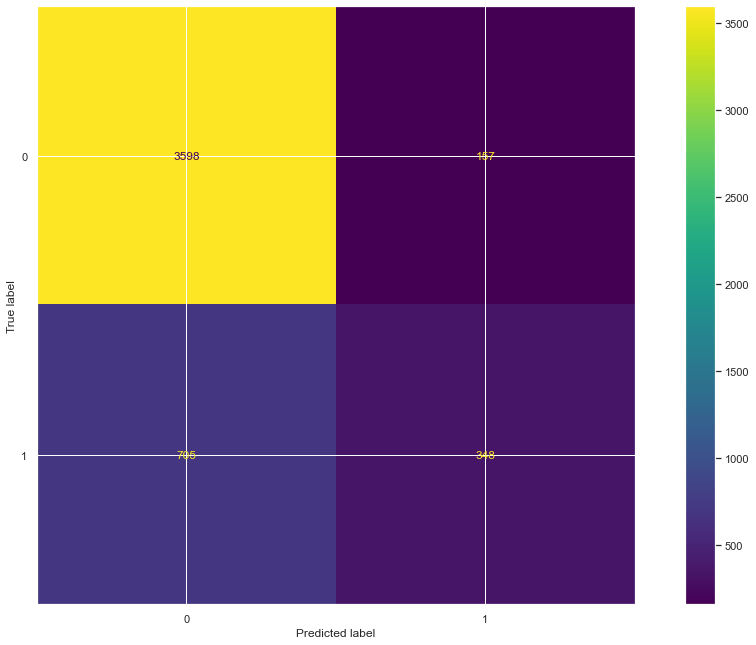

In [279]:
model_final_LR=LogisticRegression(random_state=0,C=0.4,max_iter=1000,penalty='l1',solver='liblinear')
model_final_LR.fit(X_train_fs,Y_train)
y_pred_LR=model_final_LR.predict(X_test_fs)
model_final_LR.score(X_train_fs,Y_train)
plot_confusion_matrix(model_final_LR,X_test_fs,Y_test)

In [280]:
y_score_LR=model_final_LR.predict_proba(X_test_fs)
fpr_LR,tpr_LR,theshold_LR=roc_curve(Y_test,y_score_LR[:,1])
roc_auc_LR=auc(fpr_LR,tpr_LR)
print(classification_report(Y_test,y_pred_LR,digits=6))

              precision    recall  f1-score   support

           0   0.836161  0.958189  0.893026      3755
           1   0.689109  0.330484  0.446727      1053

    accuracy                       0.820715      4808
   macro avg   0.762635  0.644337  0.669876      4808
weighted avg   0.803955  0.820715  0.795282      4808



- AUC - ROC curve is a performance measurement for classification problem at various thresholds settings. ROC is a probability curve and AUC represents degree or measure of separability.

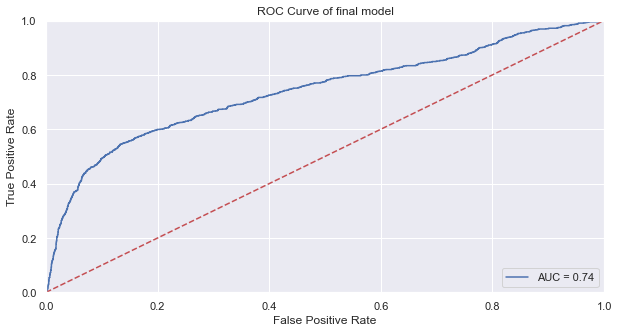

In [281]:
plt.figure(figsize=(10,5))
plt.plot(fpr_LR, tpr_LR, 'b', label = 'AUC = %0.2f' % roc_auc_LR)
plt.title('Receiver Operating Characteristic')
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve of final model')
plt.grid(True)
plt.show()

## KNN

In [282]:
"""preprocessor = make_pipeline(PolynomialFeatures(2, include_bias=False), SelectKBest(f_classif, k=10))
KNN = make_pipeline(preprocessor,KNeighborsClassifier(weights='uniform',n_neighbors=29,metric='minkowski',algorithm='kd_tree'))
hyper_paramstest = {
               'pipeline__polynomialfeatures__degree':[2, 3],
               'pipeline__selectkbest__k': range(1, 28)}
gridtest = RandomizedSearchCV(KNN, hyper_params, scoring='accuracy', cv=4,
                         random_state = 0)

gridtest.fit(X_train, Y_train)"""

"preprocessor = make_pipeline(PolynomialFeatures(2, include_bias=False), SelectKBest(f_classif, k=10))\nKNN = make_pipeline(preprocessor,KNeighborsClassifier(weights='uniform',n_neighbors=29,metric='minkowski',algorithm='kd_tree'))\nhyper_paramstest = {\n               'pipeline__polynomialfeatures__degree':[2, 3],\n               'pipeline__selectkbest__k': range(1, 28)}\ngridtest = RandomizedSearchCV(KNN, hyper_params, scoring='accuracy', cv=4,\n                         random_state = 0)\n\ngridtest.fit(X_train, Y_train)"

In [283]:
Final_model_KNN_new=Pipeline(steps=[('pipeline',
                 Pipeline(steps=[('polynomialfeatures',
                                  PolynomialFeatures(include_bias=False)),
                                 ('selectkbest', SelectKBest(k=13))])),
                ('kneighborsclassifier',
                 KNeighborsClassifier(algorithm='kd_tree', n_neighbors=29))])
Final_model_KNN_new.fit(X_train, Y_train)
Final_model_KNN_new.score(X_test, Y_test)
y_pred_KNN=Final_model_KNN_new.predict(X_test)
print(confusion_matrix(Y_test,y_pred_KNN))

[[3527  228]
 [ 628  425]]


In [284]:
y_score_KNN=Final_model_KNN_new.predict_proba(X_test)
fpr_KNN,tpr_KNN,theshold_KNN=roc_curve(Y_test,y_score_KNN[:,1])
roc_auc_KNN=auc(fpr_KNN,tpr_KNN)
print(classification_report(Y_test,y_pred_KNN,digits=6))

              precision    recall  f1-score   support

           0   0.848857  0.939281  0.891783      3755
           1   0.650842  0.403609  0.498242      1053

    accuracy                       0.821963      4808
   macro avg   0.749850  0.671445  0.695012      4808
weighted avg   0.805490  0.821963  0.805593      4808



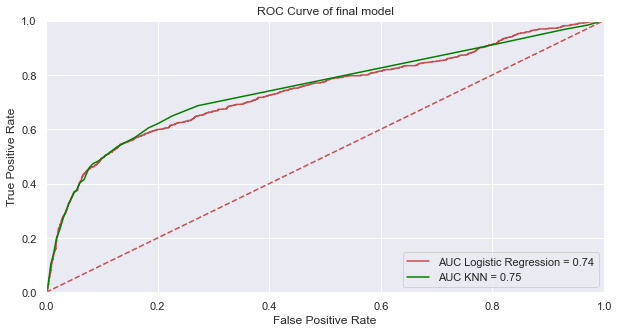

In [285]:
plt.figure(figsize=(10,5))
#plt.plot(fpr_mlp, tpr_mlp, 'b', label = 'AUC MLP = %0.2f' % roc_auc_mlp)
plt.plot(fpr_LR, tpr_LR, 'r', label = 'AUC Logistic Regression = %0.2f' % roc_auc_LR)
plt.plot(fpr_KNN, tpr_KNN, 'green', label = 'AUC KNN = %0.2f' % roc_auc_KNN)
plt.title('Receiver Operating Characteristic')
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve of final model')
plt.grid(True)
plt.show()

## SVM

In [286]:
svm = SVC(random_state=0,kernel="rbf")
svm.fit(X_train, Y_train)

SVC(random_state=0)

In [287]:
y_pred_svc_1 = svm.predict(X_test)
print(classification_report(y_pred_svc_1, Y_test))
fpr_svm, tpr_svm, threshold1 = roc_curve(Y_test, y_pred_svc_1) 
roc_auc_svm=auc(fpr_svm,tpr_svm)

              precision    recall  f1-score   support

           0       0.95      0.85      0.89      4205
           1       0.39      0.68      0.49       603

    accuracy                           0.83      4808
   macro avg       0.67      0.76      0.69      4808
weighted avg       0.88      0.83      0.84      4808



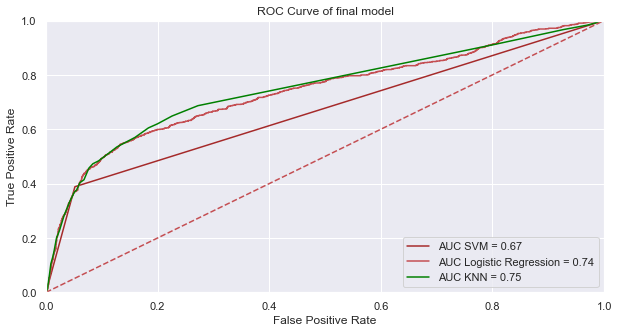

In [288]:
plt.figure(figsize=(10,5))
plt.plot(fpr_svm, tpr_svm, 'brown', label = 'AUC SVM = %0.2f' % roc_auc_svm)
plt.plot(fpr_LR, tpr_LR, 'r', label = 'AUC Logistic Regression = %0.2f' % roc_auc_LR)
plt.plot(fpr_KNN, tpr_KNN, 'green', label = 'AUC KNN = %0.2f' % roc_auc_KNN)
plt.title('Receiver Operating Characteristic')
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve of final model')
plt.grid(True)
plt.show()

## MLP

0.8242512479201332
0.8347807998335847


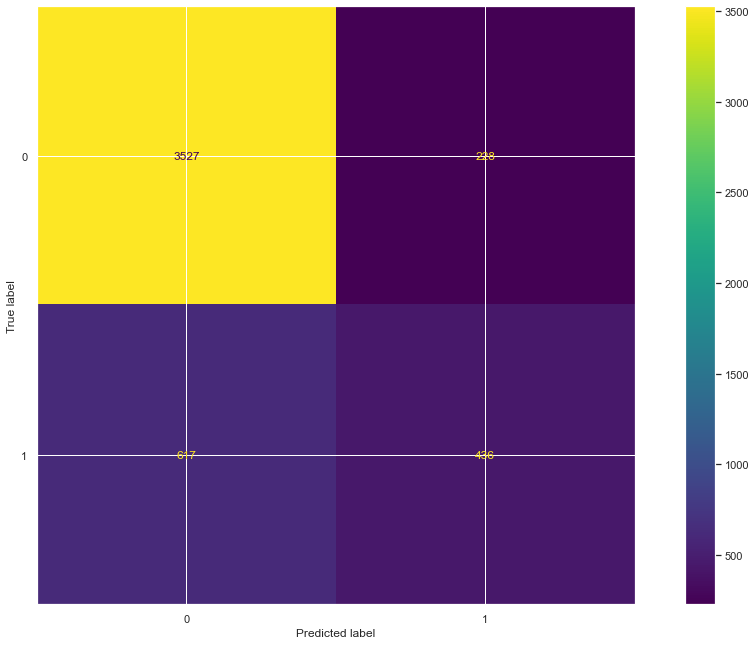

In [289]:
parameters = {'solver': ['adam','sgd'], 'max_iter': [700], 'hidden_layer_sizes':np.arange(10, 14), 'random_state':[0,1,2,3], 'activation': ['identity','logistic','tanh','relu' ]}
"""gridMLP = GridSearchCV(MLPClassifier(), parameters,cv=5)
gridMLP.fit(X_train_fs,Y_train)
print(gridMLP.best_params_)
print(gridMLP.best_score_)"""
model_final_MLP=MLPClassifier(activation='logistic',hidden_layer_sizes=13,max_iter=700,random_state=2,solver='adam',alpha=0.0001)
model_final_MLP.fit(X_train_fs,Y_train)
print(model_final_MLP.score(X_test_fs,Y_test))
print(model_final_MLP.score(X_train_fs,Y_train))
y_predMlp=model_final_MLP.predict(X_test_fs)
plot_confusion_matrix(model_final_MLP,X_test_fs,Y_test)

In [290]:
y_score_mlp=model_final_MLP.predict_proba(X_test_fs)
fpr_mlp,tpr_mlp,theshold_mlp=roc_curve(Y_test,y_score_mlp[:,1])
roc_auc_mlp=auc(fpr_mlp,tpr_mlp)
print(classification_report(Y_test,y_predMlp,digits=6))

              precision    recall  f1-score   support

           0   0.851110  0.939281  0.893024      3755
           1   0.656627  0.414055  0.507863      1053

    accuracy                       0.824251      4808
   macro avg   0.753868  0.676668  0.700443      4808
weighted avg   0.808516  0.824251  0.808670      4808



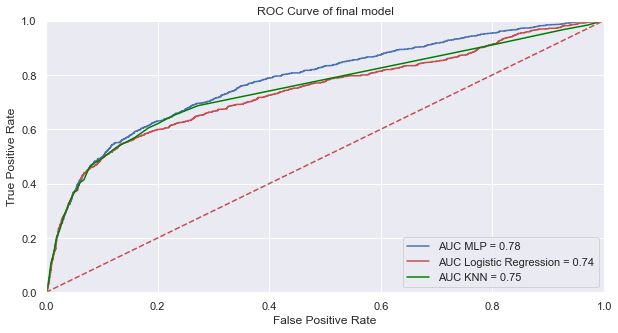

In [291]:
plt.figure(figsize=(10,5))
plt.plot(fpr_mlp, tpr_mlp, 'b', label = 'AUC MLP = %0.2f' % roc_auc_mlp)
plt.plot(fpr_LR, tpr_LR, 'r', label = 'AUC Logistic Regression = %0.2f' % roc_auc_LR)
plt.plot(fpr_KNN, tpr_KNN, 'green', label = 'AUC KNN = %0.2f' % roc_auc_KNN)
plt.title('Receiver Operating Characteristic')
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve of final model')
plt.grid(True)
plt.show()

## Arbre de decision 

In [292]:
param_grid_tree={'criterion':['gini','entropy'],'max_depth':np.arange(1,10),'splitter':['best','random'],'random_state':[0,1,2,3,4,5,6,7]}

In [293]:
"""gridTree=GridSearchCV(DecisionTreeClassifier(),param_grid_tree,cv=5)
gridTree.fit(X_train_fs,Y_train)
print(gridTree.best_params_)
print(gridTree.best_score_)"""

'gridTree=GridSearchCV(DecisionTreeClassifier(),param_grid_tree,cv=5)\ngridTree.fit(X_train_fs,Y_train)\nprint(gridTree.best_params_)\nprint(gridTree.best_score_)'

In [294]:
model_final_Tree=DecisionTreeClassifier(criterion= 'gini',max_depth=3,random_state=0,splitter='best')
model_final_Tree.fit(X_train_fs,Y_train)
print(model_final_Tree.score(X_test_fs,Y_test))
print(model_final_Tree.score(X_train_fs,Y_train))
y_pred_tree=model_final_Tree.predict(X_test_fs)

0.8225873544093179
0.8346767902647043


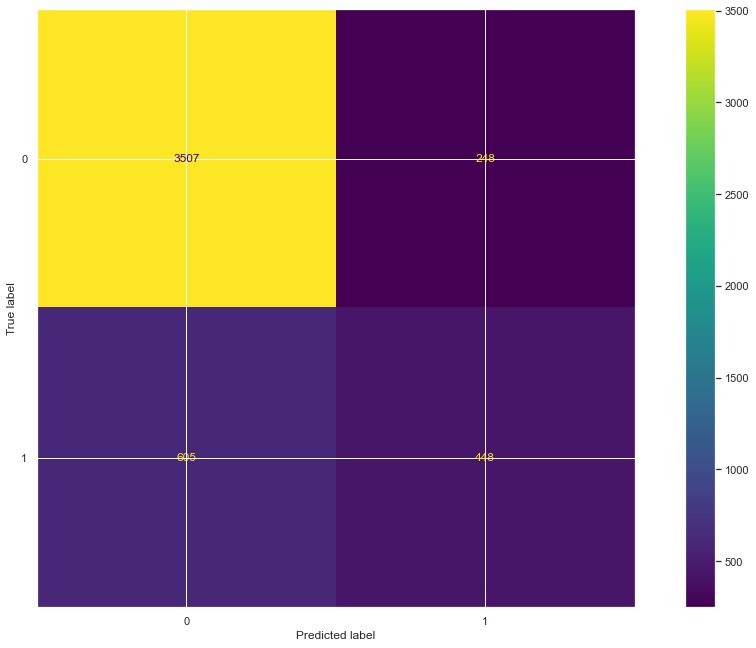

In [353]:
plot_confusion_matrix(model_final_Tree,X_test_fs,Y_test)

In [295]:
y_score_tree=model_final_Tree.predict_proba(X_test_fs)
fpr_tree,tpr_tree,theshold_tree=roc_curve(Y_test,y_score_tree[:,1])
roc_auc_tree=auc(fpr_tree,tpr_tree)
print(classification_report(Y_test,y_pred_tree,digits=6))

              precision    recall  f1-score   support

           0   0.852870  0.933955  0.891572      3755
           1   0.643678  0.425451  0.512293      1053

    accuracy                       0.822587      4808
   macro avg   0.748274  0.679703  0.701933      4808
weighted avg   0.807055  0.822587  0.808506      4808



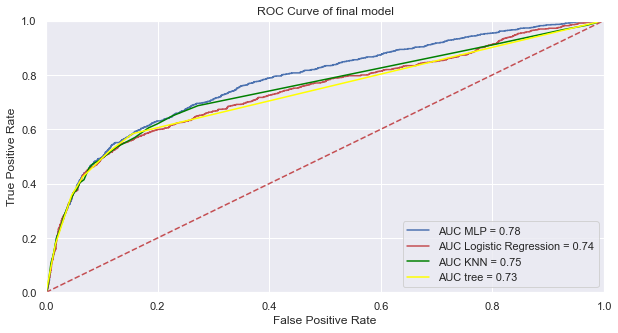

In [296]:
plt.figure(figsize=(10,5))
plt.plot(fpr_mlp, tpr_mlp, 'b', label = 'AUC MLP = %0.2f' % roc_auc_mlp)
plt.plot(fpr_LR, tpr_LR, 'r', label = 'AUC Logistic Regression = %0.2f' % roc_auc_LR)
plt.plot(fpr_KNN, tpr_KNN, 'green', label = 'AUC KNN = %0.2f' % roc_auc_KNN)
plt.plot(fpr_tree, tpr_tree, 'yellow', label = 'AUC tree = %0.2f' % roc_auc_tree)
plt.title('Receiver Operating Characteristic')
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve of final model')
plt.grid(True)
plt.show()

# Naive Bayes

In [297]:
"""nb_classifier = GaussianNB()

params_NB = {'var_smoothing': np.logspace(0,-9, num=100)}
gridNB = GridSearchCV(estimator=nb_classifier, 
                 param_grid=params_NB, 
                 cv=5,   # use any cross validation technique 
                 verbose=1, 
                 scoring='accuracy') 

gridNB.fit(X_train, Y_train)

print(gridNB.best_params_)

y_pred = gridNB.predict(X_test)

print(classification_report(Y_test, y_pred))"""

"nb_classifier = GaussianNB()\n\nparams_NB = {'var_smoothing': np.logspace(0,-9, num=100)}\ngridNB = GridSearchCV(estimator=nb_classifier, \n                 param_grid=params_NB, \n                 cv=5,   # use any cross validation technique \n                 verbose=1, \n                 scoring='accuracy') \n\ngridNB.fit(X_train, Y_train)\n\nprint(gridNB.best_params_)\n\ny_pred = gridNB.predict(X_test)\n\nprint(classification_report(Y_test, y_pred))"

In [298]:
"""preprocessor = make_pipeline(PolynomialFeatures(2, include_bias=False), SelectKBest(f_classif, k=10))
GaussianNB = make_pipeline(preprocessor,GaussianNB(var_smoothing= 0.658))"""

'preprocessor = make_pipeline(PolynomialFeatures(2, include_bias=False), SelectKBest(f_classif, k=10))\nGaussianNB = make_pipeline(preprocessor,GaussianNB(var_smoothing= 0.658))'

In [299]:
"""hyper_params = {
               'pipeline__polynomialfeatures__degree':[2, 3],
               'pipeline__selectkbest__k': range(2, 28)}
grid = RandomizedSearchCV(GaussianNB, hyper_params, scoring='accuracy', cv=5
                         )

grid.fit(X_train, Y_train)

print(grid.best_params_)"""



"hyper_params = {\n               'pipeline__polynomialfeatures__degree':[2, 3],\n               'pipeline__selectkbest__k': range(2, 28)}\ngrid = RandomizedSearchCV(GaussianNB, hyper_params, scoring='accuracy', cv=5\n                         )\n\ngrid.fit(X_train, Y_train)\n\nprint(grid.best_params_)"

              precision    recall  f1-score   support

           0       0.84      0.93      0.89      3755
           1       0.61      0.38      0.47      1053

    accuracy                           0.81      4808
   macro avg       0.73      0.66      0.68      4808
weighted avg       0.79      0.81      0.79      4808



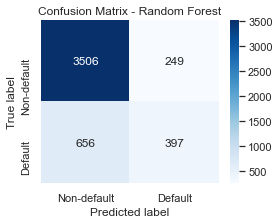

In [300]:
model_final_NB=Pipeline(steps=[('pipeline',
                 Pipeline(steps=[('polynomialfeatures',
                                  PolynomialFeatures(degree=3,
                                                     include_bias=False)),
                                 ('selectkbest', SelectKBest(k=6))])),
                ('gaussiannb', GaussianNB(var_smoothing=0.658))])
model_final_NB.fit(X_train,Y_train)
y_pred_NB = model_final_NB.predict(X_test)

print(classification_report(Y_test, y_pred_NB))
plt.figure(figsize=(4,3))
ConfMatrix = confusion_matrix(Y_test,model_final_NB.predict(X_test))
sns.heatmap(ConfMatrix,annot=True, cmap="Blues", fmt="d", 
            xticklabels = ['Non-default', 'Default'], 
            yticklabels = ['Non-default', 'Default'])
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title("Confusion Matrix - Random Forest");

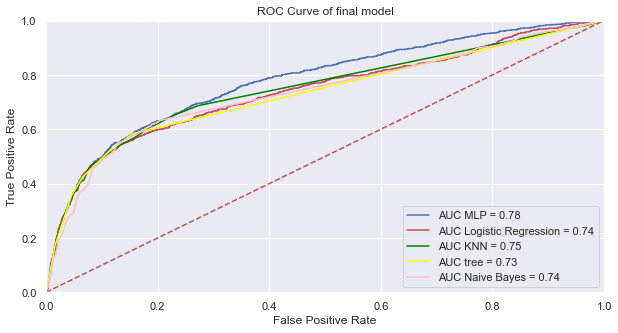

In [301]:
y_score_NB=model_final_NB.predict_proba(X_test)
fpr_NB,tpr_NB,theshold_NB=roc_curve(Y_test,y_score_NB[:,1])
roc_auc_NB=auc(fpr_NB,tpr_NB)

plt.figure(figsize=(10,5))
plt.plot(fpr_mlp, tpr_mlp, 'b', label = 'AUC MLP = %0.2f' % roc_auc_mlp)
plt.plot(fpr_LR, tpr_LR, 'r', label = 'AUC Logistic Regression = %0.2f' % roc_auc_LR)
plt.plot(fpr_KNN, tpr_KNN, 'green', label = 'AUC KNN = %0.2f' % roc_auc_KNN)
plt.plot(fpr_tree, tpr_tree, 'yellow', label = 'AUC tree = %0.2f' % roc_auc_tree)
plt.plot(fpr_NB, tpr_NB, 'pink', label = 'AUC Naive Bayes = %0.2f' % roc_auc_NB)
plt.title('Receiver Operating Characteristic')
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve of final model')
plt.grid(True)
plt.show()

# Linear Discriminant Analysis

- Linear Discriminant Analysis  or LDA is a technique for dimension reduction that is used for modelling differences in groups  separating two or more classes

In [302]:
"""model = LinearDiscriminantAnalysis()
# define model evaluation method
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# define grid
grid = dict()
grid['solver'] = ['svd', 'lsqr', 'eigen']
grid['shrinkage'] = np.arange(0, 1, 0.01)
# define search
search = GridSearchCV(model, grid, scoring='accuracy', cv=cv, n_jobs=-1)
# perform the search
results = search.fit(X, y)
# summarize
print('Mean Accuracy: %.3f' % results.best_score_)
print('Config: %s' % results.best_params_)"""

"model = LinearDiscriminantAnalysis()\n# define model evaluation method\ncv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)\n# define grid\ngrid = dict()\ngrid['solver'] = ['svd', 'lsqr', 'eigen']\ngrid['shrinkage'] = np.arange(0, 1, 0.01)\n# define search\nsearch = GridSearchCV(model, grid, scoring='accuracy', cv=cv, n_jobs=-1)\n# perform the search\nresults = search.fit(X, y)\n# summarize\nprint('Mean Accuracy: %.3f' % results.best_score_)\nprint('Config: %s' % results.best_params_)"

In [303]:
"""preprocessorLDA = make_pipeline(PolynomialFeatures(2, include_bias=False), SelectKBest(f_classif, k=10))
LinearDiscriminantAnalysis = make_pipeline(preprocessorLDA,LinearDiscriminantAnalysis(shrinkage= 0, solver='lsqr'))
hyper_paramsLDA = {
               'pipeline__polynomialfeatures__degree':[2, 3],
               'pipeline__selectkbest__k': range(2, 28)}
gridLDA = RandomizedSearchCV(LinearDiscriminantAnalysis, hyper_paramsLDA, scoring='accuracy', cv=5,random_state=0
                         )"""

"preprocessorLDA = make_pipeline(PolynomialFeatures(2, include_bias=False), SelectKBest(f_classif, k=10))\nLinearDiscriminantAnalysis = make_pipeline(preprocessorLDA,LinearDiscriminantAnalysis(shrinkage= 0, solver='lsqr'))\nhyper_paramsLDA = {\n               'pipeline__polynomialfeatures__degree':[2, 3],\n               'pipeline__selectkbest__k': range(2, 28)}\ngridLDA = RandomizedSearchCV(LinearDiscriminantAnalysis, hyper_paramsLDA, scoring='accuracy', cv=5,random_state=0\n                         )"

              precision    recall  f1-score   support

           0       0.84      0.95      0.89      3755
           1       0.68      0.36      0.47      1053

    accuracy                           0.82      4808
   macro avg       0.76      0.66      0.68      4808
weighted avg       0.81      0.82      0.80      4808



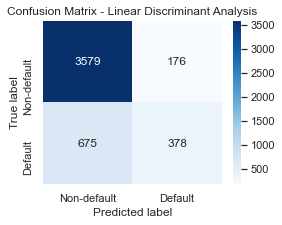

In [304]:
model_final_LDA=Pipeline(steps=[('pipeline',
                 Pipeline(steps=[('polynomialfeatures',
                                  PolynomialFeatures(degree=3,
                                                     include_bias=False)),
                                 ('selectkbest', SelectKBest(k=2))])),
                ('lineardiscriminantanalysis',
                 LinearDiscriminantAnalysis(shrinkage=0, solver='lsqr'))])
model_final_LDA.fit(X_train, Y_train)

y_predLDA = model_final_LDA.predict(X_test)

print(classification_report(Y_test, y_predLDA))
plt.figure(figsize=(4,3))
ConfMatrix = confusion_matrix(Y_test,model_final_LDA.predict(X_test))
sns.heatmap(ConfMatrix,annot=True, cmap="Blues", fmt="d", 
            xticklabels = ['Non-default', 'Default'], 
            yticklabels = ['Non-default', 'Default'])
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title("Confusion Matrix - Linear Discriminant Analysis");

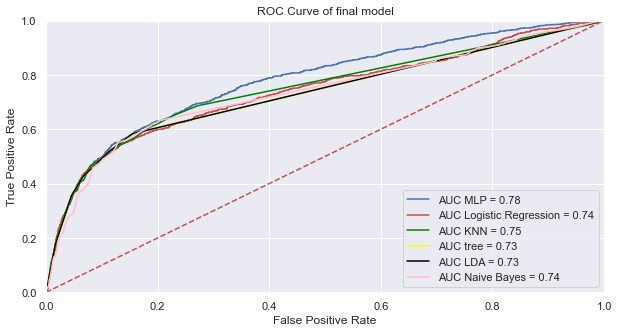

In [305]:
y_score_LDA=model_final_LDA.predict_proba(X_test)
fpr_LDA,tpr_LDA,theshold_LDA=roc_curve(Y_test,y_score_tree[:,1])
roc_auc_LDA=auc(fpr_LDA,tpr_LDA)

plt.figure(figsize=(10,5))
plt.plot(fpr_mlp, tpr_mlp, 'b', label = 'AUC MLP = %0.2f' % roc_auc_mlp)
plt.plot(fpr_LR, tpr_LR, 'r', label = 'AUC Logistic Regression = %0.2f' % roc_auc_LR)
plt.plot(fpr_KNN, tpr_KNN, 'green', label = 'AUC KNN = %0.2f' % roc_auc_KNN)
plt.plot(fpr_tree, tpr_tree, 'yellow', label = 'AUC tree = %0.2f' % roc_auc_tree)
plt.plot(fpr_LDA, tpr_LDA, 'black', label = 'AUC LDA = %0.2f' % roc_auc_LDA)
plt.plot(fpr_NB, tpr_NB, 'pink', label = 'AUC Naive Bayes = %0.2f' % roc_auc_NB)
plt.title('Receiver Operating Characteristic')
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve of final model')
plt.grid(True)
plt.show()

- the curve of mlp classifier is always above the other models that's why mlp is the best

### Les Methodes Ensemblistes

#  Bagging Classifier

 - bagging classifier fit base classifiers on randoms subsets of the training dataset to aggregate their individual predictions to form a final prediction

In [306]:
"""param_Bagging = {'n_estimators': range(10, 300),
               "max_features": range(2, 28)
               }

rf = BaggingClassifier()

rf_cv = RandomizedSearchCV(rf, param_distributions = param_Bagging, 
                           cv = 5, random_state=0, n_jobs = -1)

rf_cv.fit(X_train, Y_train)

print("Tuned Random Forest Parameters: %s" % (rf_cv.best_params_))"""

'param_Bagging = {\'n_estimators\': range(10, 300),\n               "max_features": range(2, 28)\n               }\n\nrf = BaggingClassifier()\n\nrf_cv = RandomizedSearchCV(rf, param_distributions = param_Bagging, \n                           cv = 5, random_state=0, n_jobs = -1)\n\nrf_cv.fit(X_train, Y_train)\n\nprint("Tuned Random Forest Parameters: %s" % (rf_cv.best_params_))'

              precision    recall  f1-score   support

           0       0.85      0.94      0.89      3755
           1       0.66      0.40      0.50      1053

    accuracy                           0.82      4808
   macro avg       0.75      0.67      0.70      4808
weighted avg       0.81      0.82      0.81      4808



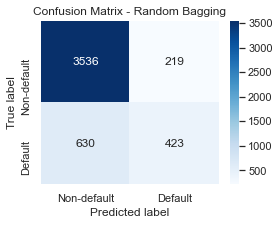

In [307]:
model_final_rb=BaggingClassifier(max_features=18, n_estimators=229)
model_final_rb.fit(X_train, Y_train)
y_predRB = model_final_rb.predict(X_test)

print(classification_report(Y_test, y_predRB))
plt.figure(figsize=(4,3))
ConfMatrix = confusion_matrix(Y_test,model_final_rb.predict(X_test))
sns.heatmap(ConfMatrix,annot=True, cmap="Blues", fmt="d", 
            xticklabels = ['Non-default', 'Default'], 
            yticklabels = ['Non-default', 'Default'])
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title("Confusion Matrix - Random Bagging");

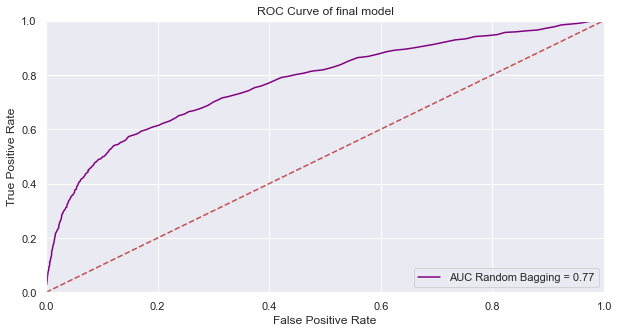

In [308]:
y_score_RB=model_final_rb.predict_proba(X_test)
fpr_rb,tpr_rb,theshold_rb=roc_curve(Y_test,y_score_RB[:,1])
roc_auc_rb=auc(fpr_rb,tpr_rb)

plt.figure(figsize=(10,5))
plt.plot(fpr_rb, tpr_rb, 'purple', label = 'AUC Random Bagging = %0.2f' % roc_auc_rb)
plt.title('Receiver Operating Characteristic')
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve of final model')
plt.grid(True)
plt.show()

# Voting Classifier

- A Voting Classifier is a machine learning model that trains on an ensemble of models and predicts an output based on their highest  probability

In [309]:
model_1 = KNeighborsClassifier(weights= 'uniform', n_neighbors=29, metric='minkowski',algorithm='kd_tree')
model_2 = DecisionTreeClassifier(criterion= 'gini',max_depth=3,random_state=0,splitter='best')
model_3 = LinearDiscriminantAnalysis(shrinkage=0, solver='lsqr')

model_4 = VotingClassifier([('KNN', model_1),
                            ('Tree', model_2),
                            ('LDA', model_3)],
                             voting='soft')

In [310]:
for model in (model_1, model_2, model_3, model_4):
    model.fit(X_train, Y_train)
    print(model.__class__.__name__, model.score(X_test, Y_test))

KNeighborsClassifier 0.822171381031614
DecisionTreeClassifier 0.8225873544093179
LinearDiscriminantAnalysis 0.8205074875207987
VotingClassifier 0.8248752079866889


              precision    recall  f1-score   support

           0       0.85      0.95      0.89      3755
           1       0.67      0.39      0.50      1053

    accuracy                           0.82      4808
   macro avg       0.76      0.67      0.69      4808
weighted avg       0.81      0.82      0.81      4808



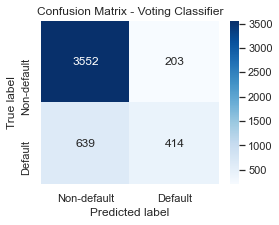

In [311]:
y_predV = model_4.predict(X_test)

print(classification_report(Y_test, y_predV))
plt.figure(figsize=(4,3))
ConfMatrix = confusion_matrix(Y_test,model_4.predict(X_test))
sns.heatmap(ConfMatrix,annot=True, cmap="Blues", fmt="d", 
            xticklabels = ['Non-default', 'Default'], 
            yticklabels = ['Non-default', 'Default'])
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title("Confusion Matrix - Voting Classifier");

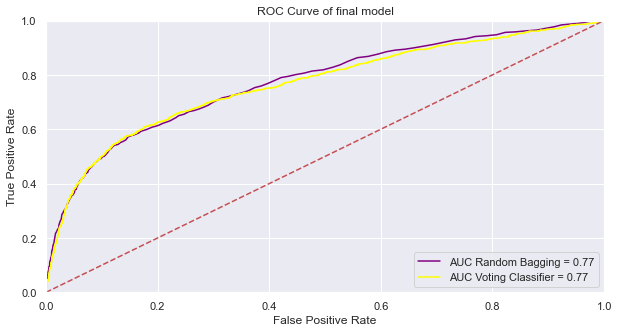

In [312]:
y_score_V=model_4.predict_proba(X_test)
fpr_V,tpr_V,theshold_V=roc_curve(Y_test,y_score_V[:,1])
roc_auc_V=auc(fpr_V,tpr_V)

plt.figure(figsize=(10,5))
plt.plot(fpr_rb, tpr_rb, 'purple', label = 'AUC Random Bagging = %0.2f' % roc_auc_rb)
plt.plot(fpr_V, tpr_V, 'yellow', label = 'AUC Voting Classifier = %0.2f' % roc_auc_V)
plt.title('Receiver Operating Characteristic')
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve of final model')
plt.grid(True)
plt.show()

## Stacking Classifier

- Stacking is a technique that takes several classification models and uses their output as the input for the meta-classifier

In [313]:
model = StackingClassifier([('KNN', model_1),
                            ('Tree', model_2),
                            ('LDA', model_3)],
                             final_estimator=KNeighborsClassifier(weights= 'uniform', n_neighbors=29, metric='minkowski',algorithm='kd_tree'))

model.fit(X_train, Y_train)
model.score(X_test, Y_test)

0.8244592346089851

              precision    recall  f1-score   support

           0       0.85      0.94      0.89      3755
           1       0.66      0.42      0.51      1053

    accuracy                           0.82      4808
   macro avg       0.75      0.68      0.70      4808
weighted avg       0.81      0.82      0.81      4808



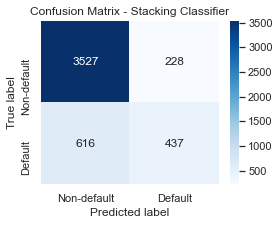

In [314]:
y_pred_SC = model.predict(X_test)

print(classification_report(Y_test, y_pred_SC))
plt.figure(figsize=(4,3))
ConfMatrix = confusion_matrix(Y_test,model.predict(X_test))
sns.heatmap(ConfMatrix,annot=True, cmap="Blues", fmt="d", 
            xticklabels = ['Non-default', 'Default'], 
            yticklabels = ['Non-default', 'Default'])
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title("Confusion Matrix - Stacking Classifier");

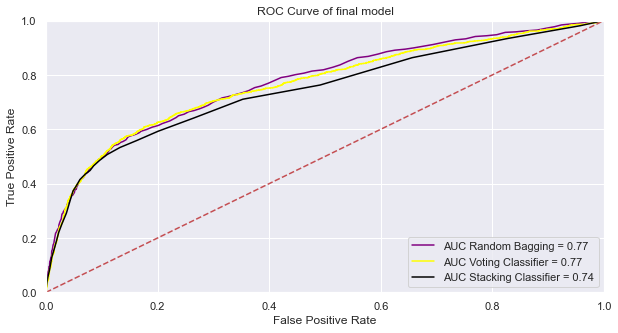

In [315]:
y_score_SC=model.predict_proba(X_test)
fpr_SC,tpr_SC,theshold_SC=roc_curve(Y_test,y_score_SC[:,1])
roc_auc_SC=auc(fpr_SC,tpr_SC)

plt.figure(figsize=(10,5))
plt.plot(fpr_rb, tpr_rb, 'purple', label = 'AUC Random Bagging = %0.2f' % roc_auc_rb)
plt.plot(fpr_V, tpr_V, 'yellow', label = 'AUC Voting Classifier = %0.2f' % roc_auc_V)
plt.plot(fpr_SC, tpr_SC, 'black', label = 'AUC Stacking Classifier = %0.2f' % roc_auc_SC)
plt.title('Receiver Operating Characteristic')
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve of final model')
plt.grid(True)
plt.show()

## GradientBoostingClassifier

- Gradient boosting classifiers are a group of machine learning algorithms that combine many weak learning models together to create a strong predictive model. Decision trees are usually used when doing gradient boosting

In [316]:
"""GBC_classifier = GradientBoostingClassifier(random_state=42)

parameters = {'n_estimators':[500, 1000], 
              'learning_rate':[0.01, 0.03, 0.05],
              'min_samples_split':[2,4,6],
              'min_samples_leaf':[3,5,7]}

GBC_obj = RandomizedSearchCV(GBC_classifier, 
                             parameters, 
                             scoring = 'accuracy', 
                             cv = 5,
                             random_state= 99)
GBC_fit = GBC_obj.fit(X_train, Y_train)
GBC_opt = ada_fit.best_estimator_"""

"GBC_classifier = GradientBoostingClassifier(random_state=42)\n\nparameters = {'n_estimators':[500, 1000], \n              'learning_rate':[0.01, 0.03, 0.05],\n              'min_samples_split':[2,4,6],\n              'min_samples_leaf':[3,5,7]}\n\nGBC_obj = RandomizedSearchCV(GBC_classifier, \n                             parameters, \n                             scoring = 'accuracy', \n                             cv = 5,\n                             random_state= 99)\nGBC_fit = GBC_obj.fit(X_train, Y_train)\nGBC_opt = ada_fit.best_estimator_"

In [25]:
model_final_GB=GradientBoostingClassifier(learning_rate=0.01, min_samples_leaf=5,
                           min_samples_split=6, n_estimators=500,
                           random_state=42)
model_final_GB.fit(X_train,Y_train)

GradientBoostingClassifier(learning_rate=0.01, min_samples_leaf=5,
                           min_samples_split=6, n_estimators=500,
                           random_state=42)

              precision    recall  f1-score   support

           0       0.85      0.94      0.89      3755
           1       0.67      0.42      0.51      1053

    accuracy                           0.83      4808
   macro avg       0.76      0.68      0.70      4808
weighted avg       0.81      0.83      0.81      4808



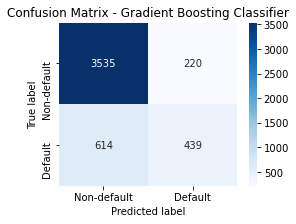

In [26]:
y_pred_GB = model_final_GB.predict(X_test)

print(classification_report(Y_test, y_pred_GB))
plt.figure(figsize=(4,3))
ConfMatrix = confusion_matrix(Y_test,model_final_GB.predict(X_test))
sns.heatmap(ConfMatrix,annot=True, cmap="Blues", fmt="d", 
            xticklabels = ['Non-default', 'Default'], 
            yticklabels = ['Non-default', 'Default'])
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title("Confusion Matrix - Gradient Boosting Classifier");

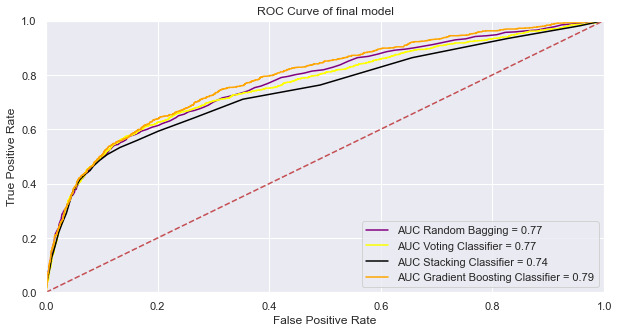

In [319]:
y_score_GB=model_final_GB.predict_proba(X_test)
fpr_GB,tpr_GB,theshold_GB=roc_curve(Y_test,y_score_GB[:,1])
roc_auc_GB=auc(fpr_GB,tpr_GB)

plt.figure(figsize=(10,5))
plt.plot(fpr_rb, tpr_rb, 'purple', label = 'AUC Random Bagging = %0.2f' % roc_auc_rb)
plt.plot(fpr_V, tpr_V, 'yellow', label = 'AUC Voting Classifier = %0.2f' % roc_auc_V)
plt.plot(fpr_SC, tpr_SC, 'black', label = 'AUC Stacking Classifier = %0.2f' % roc_auc_SC)
plt.plot(fpr_GB, tpr_GB, 'orange', label = 'AUC Gradient Boosting Classifier = %0.2f' % roc_auc_GB)
plt.title('Receiver Operating Characteristic')
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve of final model')
plt.grid(True)
plt.show()

## Random Forest 

In [320]:
"""rfc=RandomForestClassifier(random_state=42)
param_grid_rf = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}
CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid_rf, cv= 5)
CV_rfc.fit(X_train_fs, Y_train)"""


"rfc=RandomForestClassifier(random_state=42)\nparam_grid_rf = { \n    'n_estimators': [200, 500],\n    'max_features': ['auto', 'sqrt', 'log2'],\n    'max_depth' : [4,5,6,7,8],\n    'criterion' :['gini', 'entropy']\n}\nCV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid_rf, cv= 5)\nCV_rfc.fit(X_train_fs, Y_train)"

In [23]:
RFC=RandomForestClassifier(random_state=0,criterion='gini',max_depth=8,max_features='auto',n_estimators=200)
RFC.fit(X_train_fs, Y_train)
print(RFC.score(X_test_fs, Y_test))
print(RFC.score(X_train_fs, Y_train))
y_pred_rf=RFC.predict(X_test_fs)

C:\Users\Asus\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


0.8267470881863561
0.8525144313276821


In [24]:
y_score_rf=RFC.predict_proba(X_test_fs)
fpr_rf,tpr_rf,theshold_rf=roc_curve(Y_test,y_score_rf[:,1])
roc_auc_rf=auc(fpr_rf,tpr_rf)
print(classification_report(Y_test,y_pred_rf,digits=6))

              precision    recall  f1-score   support

           0   0.851879  0.941944  0.894650      3755
           1   0.667683  0.415954  0.512580      1053

    accuracy                       0.826747      4808
   macro avg   0.759781  0.678949  0.703615      4808
weighted avg   0.811538  0.826747  0.810973      4808



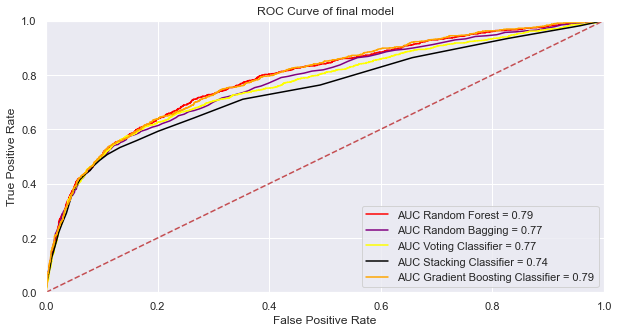

In [323]:
plt.figure(figsize=(10,5))
plt.plot(fpr_rf, tpr_rf, 'red', label = 'AUC Random Forest = %0.2f' % roc_auc_rf)
plt.plot(fpr_rb, tpr_rb, 'purple', label = 'AUC Random Bagging = %0.2f' % roc_auc_rb)
plt.plot(fpr_V, tpr_V, 'yellow', label = 'AUC Voting Classifier = %0.2f' % roc_auc_V)
plt.plot(fpr_SC, tpr_SC, 'black', label = 'AUC Stacking Classifier = %0.2f' % roc_auc_SC)
plt.plot(fpr_GB, tpr_GB, 'orange', label = 'AUC Gradient Boosting Classifier = %0.2f' % roc_auc_GB)
plt.title('Receiver Operating Characteristic')
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve of final model')
plt.grid(True)
plt.show()

## XGBOOST

In [324]:
"""param_grid_XG = {
        'max_depth': range (2, 10, 1),
    'n_estimators': range(60, 220, 40),
    'learning_rate': [0.1, 0.01, 0.05]
        }
gridxg=GridSearchCV(XGBClassifier(),param_grid_XG,cv=5)
gridxg.fit(X_train_fs, Y_train)"""


"param_grid_XG = {\n        'max_depth': range (2, 10, 1),\n    'n_estimators': range(60, 220, 40),\n    'learning_rate': [0.1, 0.01, 0.05]\n        }\ngridxg=GridSearchCV(XGBClassifier(),param_grid_XG,cv=5)\ngridxg.fit(X_train_fs, Y_train)"

In [331]:
model_final_xg=XGBClassifier(learning_rate=0.1,max_depth=2,n_estimators=100)
model_final_xg.fit(X_train_fs, Y_train)
print(model_final_xg.score(X_train_fs, Y_train))
print(model_final_xg.score(X_test_fs, Y_test))
y_pred_xg=model_final_xg.predict(X_test_fs)

C:\Users\elyes\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[22:37:42] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
0.835820895522388
0.8244592346089851


In [332]:
y_score_xg=model_final_xg.predict_proba(X_test_fs)
fpr_xg,tpr_xg,theshold_xg=roc_curve(Y_test,y_score_xg[:,1])
roc_auc_xg=auc(fpr_xg,tpr_xg)
print(classification_report(Y_test,y_pred_xg,digits=6))

              precision    recall  f1-score   support

           0   0.850132  0.941145  0.893327      3755
           1   0.660522  0.408357  0.504695      1053

    accuracy                       0.824459      4808
   macro avg   0.755327  0.674751  0.699011      4808
weighted avg   0.808606  0.824459  0.808212      4808



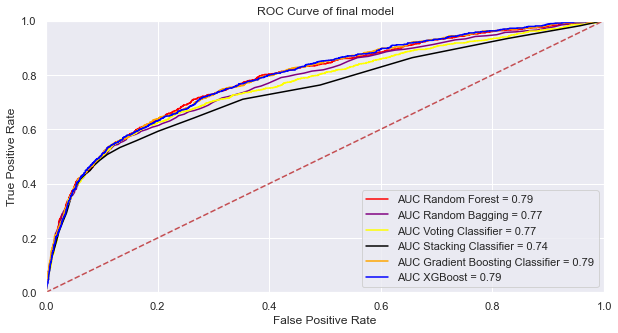

In [333]:
plt.figure(figsize=(10,5))
plt.plot(fpr_rf, tpr_rf, 'red', label = 'AUC Random Forest = %0.2f' % roc_auc_rf)
plt.plot(fpr_rb, tpr_rb, 'purple', label = 'AUC Random Bagging = %0.2f' % roc_auc_rb)
plt.plot(fpr_V, tpr_V, 'yellow', label = 'AUC Voting Classifier = %0.2f' % roc_auc_V)
plt.plot(fpr_SC, tpr_SC, 'black', label = 'AUC Stacking Classifier = %0.2f' % roc_auc_SC)
plt.plot(fpr_GB, tpr_GB, 'orange', label = 'AUC Gradient Boosting Classifier = %0.2f' % roc_auc_GB)
plt.plot(fpr_xg, tpr_xg, 'blue', label = 'AUC XGBoost = %0.2f' % roc_auc_xg)
plt.title('Receiver Operating Characteristic')
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve of final model')
plt.grid(True)
plt.show()

## AdaBoost

In [334]:
"""param_grid_ada= {
        'algorithm': ['SAMME','SAMME.R'],
    'n_estimators': [10,50,100,500],
    'learning_rate': [0.1, 0.01, 0.001,0.0001,1.0]
        }
gridada=GridSearchCV(AdaBoostClassifier(),param_grid_ada,cv=5)
gridada.fit(X_train_fs, Y_train)"""

"param_grid_ada= {\n        'algorithm': ['SAMME','SAMME.R'],\n    'n_estimators': [10,50,100,500],\n    'learning_rate': [0.1, 0.01, 0.001,0.0001,1.0]\n        }\ngridada=GridSearchCV(AdaBoostClassifier(),param_grid_ada,cv=5)\ngridada.fit(X_train_fs, Y_train)"

In [335]:
model_final_ada=AdaBoostClassifier(learning_rate=0.1,algorithm='SAMME',n_estimators=10)
model_final_ada.fit(X_train_fs, Y_train)
print(model_final_ada.score(X_train_fs, Y_train))
print(model_final_ada.score(X_test_fs, Y_test))
y_pred_ada=model_final_ada.predict(X_test_fs)

0.832076551042696
0.822171381031614


In [336]:
y_score_ada=model_final_ada.predict_proba(X_test_fs)
fpr_ada,tpr_ada,theshold_ada=roc_curve(Y_test,y_score_ada[:,1])
roc_auc_ada=auc(fpr_ada,tpr_ada)
print(classification_report(Y_test,y_pred_ada,digits=6))


              precision    recall  f1-score   support

           0   0.841176  0.952064  0.893192      3755
           1   0.677419  0.358974  0.469274      1053

    accuracy                       0.822171      4808
   macro avg   0.759298  0.655519  0.681233      4808
weighted avg   0.805312  0.822171  0.800349      4808



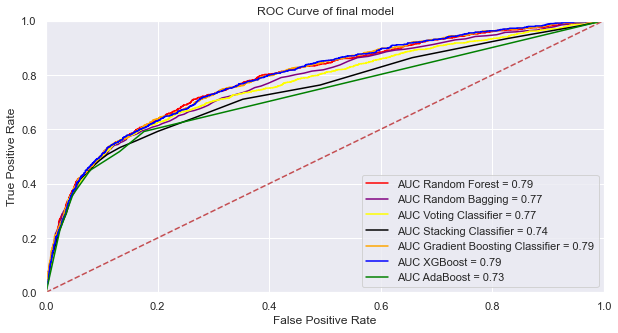

In [337]:
plt.figure(figsize=(10,5))
plt.plot(fpr_rf, tpr_rf, 'red', label = 'AUC Random Forest = %0.2f' % roc_auc_rf)
plt.plot(fpr_rb, tpr_rb, 'purple', label = 'AUC Random Bagging = %0.2f' % roc_auc_rb)
plt.plot(fpr_V, tpr_V, 'yellow', label = 'AUC Voting Classifier = %0.2f' % roc_auc_V)
plt.plot(fpr_SC, tpr_SC, 'black', label = 'AUC Stacking Classifier = %0.2f' % roc_auc_SC)
plt.plot(fpr_GB, tpr_GB, 'orange', label = 'AUC Gradient Boosting Classifier = %0.2f' % roc_auc_GB)
plt.plot(fpr_xg, tpr_xg, 'blue', label = 'AUC XGBoost = %0.2f' % roc_auc_xg)
plt.plot(fpr_ada, tpr_ada, 'green', label = 'AUC AdaBoost = %0.2f' % roc_auc_ada)
plt.title('Receiver Operating Characteristic')
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve of final model')
plt.grid(True)
plt.show()

## CatBoost

In [338]:
"""
parameters = {'depth'         : sp_randInt(4, 10),
                  'learning_rate' : sp_randFloat(),
                  'iterations'    : sp_randInt(10, 100)
                 }
randm = RandomizedSearchCV(estimator=CatBoostClassifier(), param_distributions = parameters, 
                               cv = 5, n_iter = 10, n_jobs=-1)
randm.fit(X_train, Y_train)
randm.best_score_"""

"\nparameters = {'depth'         : sp_randInt(4, 10),\n                  'learning_rate' : sp_randFloat(),\n                  'iterations'    : sp_randInt(10, 100)\n                 }\nrandm = RandomizedSearchCV(estimator=CatBoostClassifier(), param_distributions = parameters, \n                               cv = 5, n_iter = 10, n_jobs=-1)\nrandm.fit(X_train, Y_train)\nrandm.best_score_"

In [339]:
model_final_CB=CatBoostClassifier(depth=5,iterations=24,learning_rate=0.69)
model_final_CB.fit(X_train, Y_train)
model_final_CB.score(X_test,Y_test)

0:	learn: 0.4378076	total: 194ms	remaining: 4.45s
1:	learn: 0.4160397	total: 214ms	remaining: 2.35s
2:	learn: 0.4099614	total: 231ms	remaining: 1.62s
3:	learn: 0.4075650	total: 248ms	remaining: 1.24s
4:	learn: 0.4056698	total: 266ms	remaining: 1.01s
5:	learn: 0.4035336	total: 284ms	remaining: 853ms
6:	learn: 0.4021886	total: 306ms	remaining: 744ms
7:	learn: 0.4008425	total: 326ms	remaining: 652ms
8:	learn: 0.3999409	total: 343ms	remaining: 571ms
9:	learn: 0.3989950	total: 360ms	remaining: 503ms
10:	learn: 0.3976109	total: 375ms	remaining: 444ms
11:	learn: 0.3965057	total: 396ms	remaining: 396ms
12:	learn: 0.3958478	total: 413ms	remaining: 349ms
13:	learn: 0.3944275	total: 434ms	remaining: 310ms
14:	learn: 0.3935649	total: 451ms	remaining: 270ms
15:	learn: 0.3924333	total: 468ms	remaining: 234ms
16:	learn: 0.3915678	total: 488ms	remaining: 201ms
17:	learn: 0.3897063	total: 510ms	remaining: 170ms
18:	learn: 0.3884618	total: 526ms	remaining: 138ms
19:	learn: 0.3873636	total: 543ms	remaini

0.8175956738768719

              precision    recall  f1-score   support

           0       0.85      0.93      0.89      3755
           1       0.63      0.41      0.50      1053

    accuracy                           0.82      4808
   macro avg       0.74      0.67      0.69      4808
weighted avg       0.80      0.82      0.80      4808



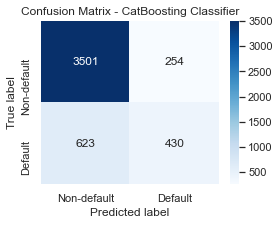

In [340]:
y_pred_CB = model_final_CB.predict(X_test)

print(classification_report(Y_test, y_pred_CB))
plt.figure(figsize=(4,3))
ConfMatrix = confusion_matrix(Y_test,model_final_CB.predict(X_test))
sns.heatmap(ConfMatrix,annot=True, cmap="Blues", fmt="d", 
            xticklabels = ['Non-default', 'Default'], 
            yticklabels = ['Non-default', 'Default'])
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title("Confusion Matrix - CatBoosting Classifier");

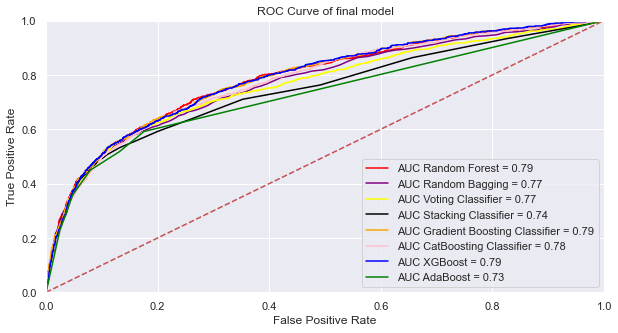

In [341]:
y_score_CB=model_final_CB.predict_proba(X_test)
fpr_CB,tpr_CB,theshold_CB=roc_curve(Y_test,y_score_CB[:,1])
roc_auc_CB=auc(fpr_CB,tpr_CB)

plt.figure(figsize=(10,5))
plt.plot(fpr_rf, tpr_rf, 'red', label = 'AUC Random Forest = %0.2f' % roc_auc_rf)
plt.plot(fpr_rb, tpr_rb, 'purple', label = 'AUC Random Bagging = %0.2f' % roc_auc_rb)
plt.plot(fpr_V, tpr_V, 'yellow', label = 'AUC Voting Classifier = %0.2f' % roc_auc_V)
plt.plot(fpr_SC, tpr_SC, 'black', label = 'AUC Stacking Classifier = %0.2f' % roc_auc_SC)
plt.plot(fpr_GB, tpr_GB, 'orange', label = 'AUC Gradient Boosting Classifier = %0.2f' % roc_auc_GB)
plt.plot(fpr_CB, tpr_CB, 'pink', label = 'AUC CatBoosting Classifier = %0.2f' % roc_auc_CB)
plt.plot(fpr_xg, tpr_xg, 'blue', label = 'AUC XGBoost = %0.2f' % roc_auc_xg)
plt.plot(fpr_ada, tpr_ada, 'green', label = 'AUC AdaBoost = %0.2f' % roc_auc_ada)
plt.title('Receiver Operating Characteristic')
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve of final model')
plt.grid(True)
plt.show()

## LightGBM

In [342]:
"""param_grid = {
    'num_leaves': [31, 127],
    'reg_alpha': [0.1, 0.5],
    'min_data_in_leaf': [30, 50, 100, 300, 400],
    'lambda_l1': [0, 1, 1.5],
    'lambda_l2': [0, 1]
    }
gridGBM=GridSearchCV(lgb.LGBMClassifier(),param_grid, 
                               cv = 5)
gridGBM.fit(X_train,Y_train)"""

"param_grid = {\n    'num_leaves': [31, 127],\n    'reg_alpha': [0.1, 0.5],\n    'min_data_in_leaf': [30, 50, 100, 300, 400],\n    'lambda_l1': [0, 1, 1.5],\n    'lambda_l2': [0, 1]\n    }\ngridGBM=GridSearchCV(lgb.LGBMClassifier(),param_grid, \n                               cv = 5)\ngridGBM.fit(X_train,Y_train)"

In [343]:
model_final_lg=lgb.LGBMClassifier(lambda_l1=0, lambda_l2=0, min_data_in_leaf=300, reg_alpha=0.1)
model_final_lg.fit(X_train,Y_train)
model_final_lg.score(X_test,Y_test)

[LightGBM] [Warning] min_data_in_leaf is set=300, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=300
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.1 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0


0.8196755407653911

              precision    recall  f1-score   support

           0       0.85      0.93      0.89      3755
           1       0.64      0.41      0.50      1053

    accuracy                           0.82      4808
   macro avg       0.74      0.67      0.70      4808
weighted avg       0.80      0.82      0.80      4808



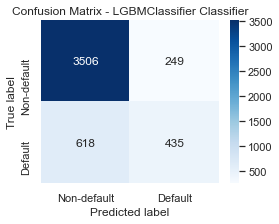

In [344]:
y_pred_lg = model_final_lg.predict(X_test)

print(classification_report(Y_test, y_pred_lg))
plt.figure(figsize=(4,3))
ConfMatrix = confusion_matrix(Y_test,model_final_lg.predict(X_test))
sns.heatmap(ConfMatrix,annot=True, cmap="Blues", fmt="d", 
            xticklabels = ['Non-default', 'Default'], 
            yticklabels = ['Non-default', 'Default'])
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title("Confusion Matrix - LGBMClassifier Classifier");

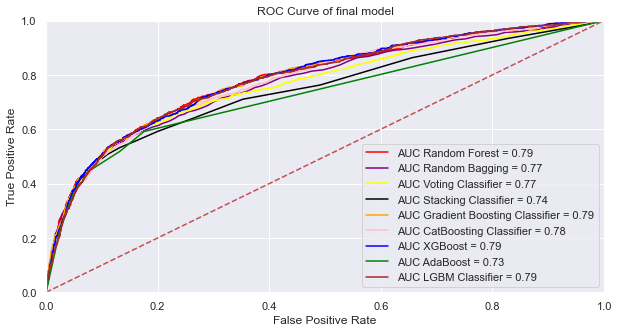

In [345]:
y_score_lg=model_final_lg.predict_proba(X_test)
fpr_lg,tpr_lg,theshold_lg=roc_curve(Y_test,y_score_lg[:,1])
roc_auc_lg=auc(fpr_lg,tpr_lg)

plt.figure(figsize=(10,5))
plt.plot(fpr_rf, tpr_rf, 'red', label = 'AUC Random Forest = %0.2f' % roc_auc_rf)
plt.plot(fpr_rb, tpr_rb, 'purple', label = 'AUC Random Bagging = %0.2f' % roc_auc_rb)
plt.plot(fpr_V, tpr_V, 'yellow', label = 'AUC Voting Classifier = %0.2f' % roc_auc_V)
plt.plot(fpr_SC, tpr_SC, 'black', label = 'AUC Stacking Classifier = %0.2f' % roc_auc_SC)
plt.plot(fpr_GB, tpr_GB, 'orange', label = 'AUC Gradient Boosting Classifier = %0.2f' % roc_auc_GB)
plt.plot(fpr_CB, tpr_CB, 'pink', label = 'AUC CatBoosting Classifier = %0.2f' % roc_auc_CB)
plt.plot(fpr_xg, tpr_xg, 'blue', label = 'AUC XGBoost = %0.2f' % roc_auc_xg)
plt.plot(fpr_ada, tpr_ada, 'green', label = 'AUC AdaBoost = %0.2f' % roc_auc_ada)
plt.plot(fpr_lg, tpr_lg, 'brown', label = 'AUC LGBM Classifier = %0.2f' % roc_auc_lg)
#plt.plot(fpr_svm, tpr_svm, 'brown', label = 'AUC SVM = %0.2f' % roc_auc_lg)
plt.title('Receiver Operating Characteristic')
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve of final model')
plt.grid(True)
plt.show()

- We obtain most successful model with Random Forest Classifier or Gradient Boosting Classifier for this problem. According to Roc-Auc Curve

# Evaluation

In [346]:
models = []
models.append(('Logistic Regression', model_final_LR, X_train_fs, Y_train, X_test_fs, Y_test))
models.append(('KNN', Final_model_KNN_new, X_train, Y_train, X_test, Y_test ))
models.append(('MLP', model_final_MLP, X_train_fs, Y_train, X_test_fs, Y_test ))
models.append(('Decision Tree', model_final_Tree, X_train_fs, Y_train, X_test_fs, Y_test ))
models.append(('Naive Bayes', model_final_NB, X_train, Y_train, X_test, Y_test ))
models.append(('Linear Discriminant Analysis', model_final_LDA, X_train, Y_train, X_test, Y_test ))
models.append(('Bagging', model_final_rb, X_train, Y_train, X_test, Y_test ))
models.append(('Voting', model_4, X_train, Y_train, X_test, Y_test ))
models.append(('Stacking', model, X_train, Y_train, X_test, Y_test ))
models.append(('Gradient Boosting', model_final_GB, X_train, Y_train, X_test, Y_test ))
models.append(('Random Forest', RFC, X_train_fs, Y_train, X_test_fs, Y_test))
models.append(('XGBoost', model_final_xg, X_train_fs, Y_train, X_test_fs, Y_test))
models.append(('Ada Boost', model_final_ada, X_train_fs, Y_train, X_test_fs, Y_test))
models.append(('CatBoost', model_final_CB, X_train, Y_train, X_test, Y_test))
models.append(('LightGBM', model_final_lg , X_train ,Y_train ,X_test, Y_test ))

# evaluate each model in turn
train_scores = []
test_scores = []
names = []
ypreds = []
f1_scores = []
aucs = []
precisions = []
recalls = []
auc=[roc_auc_LR,roc_auc_KNN,roc_auc_mlp,roc_auc_tree,roc_auc_NB,roc_auc_LDA,roc_auc_rb,roc_auc_V,roc_auc_SC,roc_auc_GB,roc_auc_rf
    ,roc_auc_xg,roc_auc_ada,roc_auc_CB,roc_auc_lg]

scoring = 'accuracy'
for name, mod, x_train, y_train, x_test, y_test in models:
    ypred=mod.predict(x_test)
    ypreds.append(ypred)
    precisions.append(precision_score(y_test, ypred))
    recalls.append(recall_score(y_test, ypred))
    f1_scores.append(f1_score(ypred, y_test))
    test_scores.append(mod.score(x_test,y_test))
    train_scores.append(mod.score(x_train,y_train))
    names.append(name)

In [347]:
train_df= pd.DataFrame({'Algorithms':names, 'Train Score':train_scores, 'Test Score':test_scores, 'Recall':recalls,
                        'Precision':precisions,'F1_score':f1_scores,'AUC score':auc})
train_df

,Algorithms,Train Score,Test Score,Recall,Precision,F1_score,AUC score
0,Logistic Regression,0.825836,0.820715,0.330484,0.689109,0.446727,0.739934
1,KNN,0.836445,0.821963,0.403609,0.650842,0.498242,0.748512
2,MLP,0.834781,0.824251,0.414055,0.656627,0.507863,0.778739
3,Decision Tree,0.834677,0.822587,0.425451,0.643678,0.512293,0.731507
4,Naive Bayes,0.818711,0.811772,0.377018,0.614551,0.467334,0.735857
5,Linear Discriminant Analysis,0.831713,0.823003,0.358974,0.682310,0.470442,0.731507
6,Bagging,0.999948,0.823419,0.401709,0.658879,0.499115,0.773026
7,Voting,0.833741,0.824875,0.393162,0.670989,0.495808,0.765108
8,Stacking,0.834729,0.824459,0.415005,0.657143,0.508731,0.743755
9,Gradient Boosting,0.836757,0.826539,0.416904,0.666161,0.512850,0.788764


In [348]:
train_df.describe()

,Train Score,Test Score,Recall,Precision,F1_score,AUC score
count,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000
mean,0.846842,0.822282,0.396075,0.657369,0.493462,0.760505
std,0.043190,0.003797,0.027361,0.020283,0.020288,0.024016
min,0.818711,0.811772,0.330484,0.614551,0.446727,0.728120
25%,0.832909,0.821339,0.385090,0.647260,0.482774,0.737895
50%,0.834781,0.823003,0.408357,0.658879,0.499115,0.765108
75%,0.840579,0.824459,0.414530,0.669336,0.508297,0.783230
max,0.999948,0.826747,0.425451,0.689109,0.512850,0.788764


### Interpretation :
* Random Forest has the best test score 
* Gradient Boosting has the best F1_score and AUC score
* Logistic Regression has the best precision
* Decision Tree has the best recall
* Bagging Classifier has the best train score

# Precision vs Recall

* Recall represents the percentage of actual default in the data
* Precision measures the percentage of defaults predicted by our model that actually were default

In [349]:
# Logistic regression

precision_lr, recall_lr, th_lr = precision_recall_curve(Y_test, y_pred_LR)

# Gradient Boost


precision_Gboost, recall_Gboost, th_Gboost = precision_recall_curve(Y_test, y_pred_GB)

# xgBoost


precision_xgb, recall_xgb, th_xgb = precision_recall_curve(Y_test, y_pred_xg)

# Ada Boost


precision_ada, recall_ada, th_ada = precision_recall_curve(Y_test, y_pred_ada)
# Lightgbm


precision_light, recall_light, th_light = precision_recall_curve(Y_test, y_pred_lg)


# KNN

precision_KNN, recall_KNN, th_KNN = precision_recall_curve(Y_test,y_pred_KNN)

# Decision Tree

precision_td, recall_td, th_td = precision_recall_curve(Y_test, y_pred_tree)
# neurone

precision_mlp, recall_mlp, th_mlp = precision_recall_curve(Y_test, y_predMlp)

# Random forest

precision_rf, recall_rf, th_rf = precision_recall_curve(Y_test, y_pred_rf)


# Naive Bayes


precision_nb, recall_nb, th_nb = precision_recall_curve(Y_test, y_pred_NB)

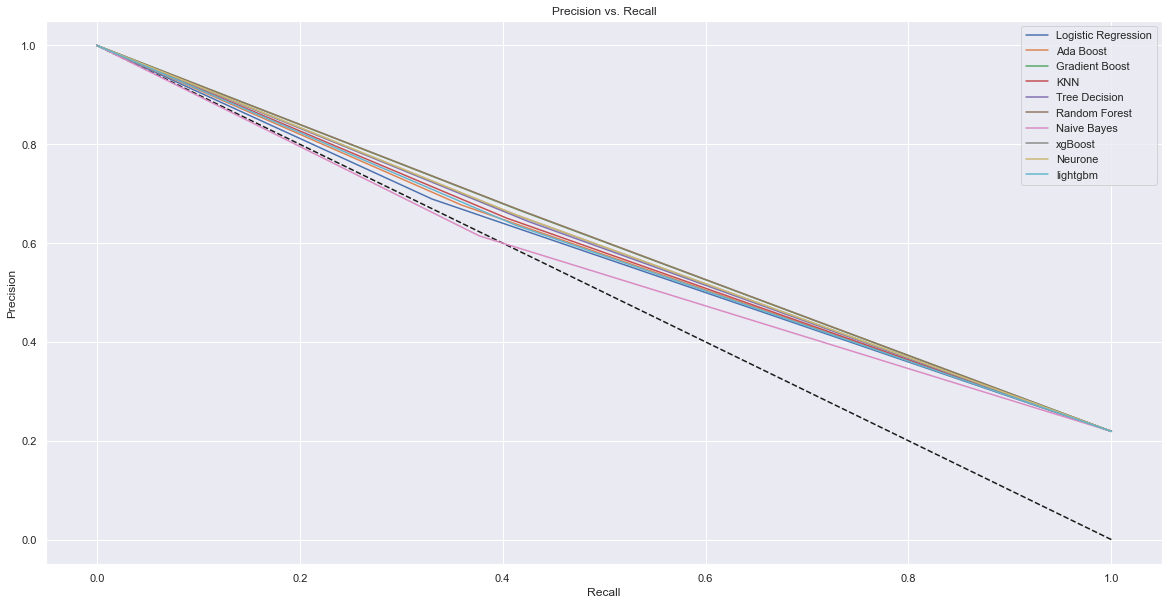

In [350]:
plt.figure(figsize=(20,10))
plt.plot([1, 0], [0, 1], 'k--')
plt.plot(recall_lr, precision_lr, label='Logistic Regression')
plt.plot(recall_ada, precision_ada, label='Ada Boost')
plt.plot(recall_Gboost, precision_Gboost, label='Gradient Boost')
plt.plot(recall_KNN, precision_KNN, label='KNN')
plt.plot(recall_td, precision_td, label='Tree Decision')
plt.plot(recall_rf, precision_rf, label='Random Forest')
plt.plot(recall_nb, precision_nb, label='Naive Bayes')
plt.plot(recall_xgb, precision_xgb, label='xgBoost')
plt.plot(recall_mlp, precision_mlp, label='Neurone')
plt.plot(recall_light, precision_light, label='lightgbm')

plt.title('Precision vs. Recall')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend(loc='best')
plt.show()



### Conclusion :

As we exposed in the data understanding section, our target variable has 22.1% will default and 77,9% won't.
So, we are facing an imbalanced classification problem where one class is represented more than another.
In such case, accuracy is not an adequate metric. Instead, we need to compare our models using ROC_auc and f1_score.
So our best model is Gradient Boosting because it has a good accuarcy and the best F1_score and AUC score.

 ### Deploiement

- Deployment is the method by which you integrate a machine learning model into an existing production environment to make practical business decisions based on data

In [27]:
#### Enrigistrer le modéle 
pickle.dump(model_final_GB,open('model.pkl','wb'))

In [34]:
lis=['1','20000','2','2','1','24','2','2','-1','-1','-2','-2','3913','3102','689','0','0','0','0','689','0','0','0']
model_final_GB.predict(pd.DataFrame(columns=['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1',
       'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6',
       'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5',
       'PAY_AMT6'],data=np.array(lis).reshape(1,23)))

array([0], dtype=int64)